In [1]:
import requests
urlexo1 = "https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+count(pl_name)+as+nbe+from+ps+where+default_flag=1&format=json"
urlexo2 = "https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+distinct+pl_name,disc_year+from+ps&format=json"
urlexo3 = "https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+distinct+pl_name,sy_dist+from+ps&format=json"
urlexo4 = "https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+distinct+pl_name,discoverymethod+from+ps+\
order+by+pl_name+&format=json"
urlexo5 = "https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+distinct+pl_name,pl_bmasse,pl_bmassj,pl_rade,\
pl_radj,pl_dens,pl_orbper,pl_eqt,hostname,st_spectype,st_mass,st_rad,st_teff,sy_dist,disc_year,disc_telescope,discoverymethod\
+from+ps+&format=json"
urlexo6 = "https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+distinct+pl_name,disc_pubdate+from+ps+\
order+by+disc_pubdate+desc+&format=json"
urlexo7 = "https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+distinct+pl_name,pl_bmasse,pl_bmassj,pl_rade,disc_pubdate,\
pl_radj,pl_dens,pl_orbper,pl_eqt,hostname,st_spectype,st_mass,st_rad,st_teff,sy_dist,disc_year,disc_telescope,discoverymethod\
+from+ps+&format=json"


In [2]:
urlexo=urlexo7
print(urlexo)
response = requests.get(urlexo)
data = response.json()
print(data[0])

https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+distinct+pl_name,pl_bmasse,pl_bmassj,pl_rade,disc_pubdate,pl_radj,pl_dens,pl_orbper,pl_eqt,hostname,st_spectype,st_mass,st_rad,st_teff,sy_dist,disc_year,disc_telescope,discoverymethod+from+ps+&format=json
{'pl_name': '4 UMa b', 'pl_bmasse': 2256.5, 'pl_bmassj': 7.1, 'pl_rade': None, 'disc_pubdate': '2007-09', 'pl_radj': None, 'pl_dens': None, 'pl_orbper': 269.3, 'pl_eqt': None, 'hostname': '4 UMa', 'st_spectype': 'K1 III', 'st_mass': 1.23, 'st_rad': 18.11, 'st_teff': 4415.0, 'sy_dist': 73.4603, 'disc_year': 2006, 'disc_telescope': '2.0 m Alfred Jensch Telescope', 'discoverymethod': 'Radial Velocity'}


In [3]:
print(len(data))

32594


In [4]:
data_name=data[0]['pl_name']
print(data_name)

4 UMa b


In [5]:
# Extraction des 'pl_name' avec set pour eliminer les doublons
pl_names = list(set(map(lambda x: x['pl_name'], data)))
#print(pl_names)
print(len(pl_names))

5834


In [6]:
print(pl_names[0])

Kepler-608 b


In [7]:
# Extraction des tuples (pl_name, disc_year) sans doublons
unique_data = list(set(map(lambda x: (x['pl_name'], x['disc_year']), data)))

print(unique_data[0:10])

[('K2-149 b', 2018), ('Kepler-380 b', 2014), ('K2-68 b', 2016), ('K2-250 b', 2018), ('BD+20 2457 b', 2009), ('HD 56414 b', 2022), ('Kepler-1894 b', 2021), ('K2-219 c', 2018), ('WASP-99 b', 2014), ('TOI-2485 b', 2024)]


In [8]:
from collections import Counter
# Compter le nombre de découvertes par année
discovery_counts = Counter(item['disc_year'] for item in data)

# Trier les résultats par année
sorted_discovery_counts = sorted(discovery_counts.items())

print(sorted_discovery_counts)

[(1992, 6), (1994, 2), (1995, 5), (1996, 41), (1997, 4), (1998, 39), (1999, 80), (2000, 78), (2001, 58), (2002, 144), (2003, 87), (2004, 173), (2005, 158), (2006, 147), (2007, 322), (2008, 328), (2009, 417), (2010, 589), (2011, 976), (2012, 1040), (2013, 941), (2014, 8088), (2015, 861), (2016, 10773), (2017, 559), (2018, 947), (2019, 528), (2020, 805), (2021, 2252), (2022, 732), (2023, 891), (2024, 507), (2025, 16)]


In [9]:
# Séparer les années et les nombres en deux listes
liste_annee, liste_nb = zip(*sorted_discovery_counts)
print(liste_annee)
print(liste_nb)

(1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025)
(6, 2, 5, 41, 4, 39, 80, 78, 58, 144, 87, 173, 158, 147, 322, 328, 417, 589, 976, 1040, 941, 8088, 861, 10773, 559, 947, 528, 805, 2252, 732, 891, 507, 16)


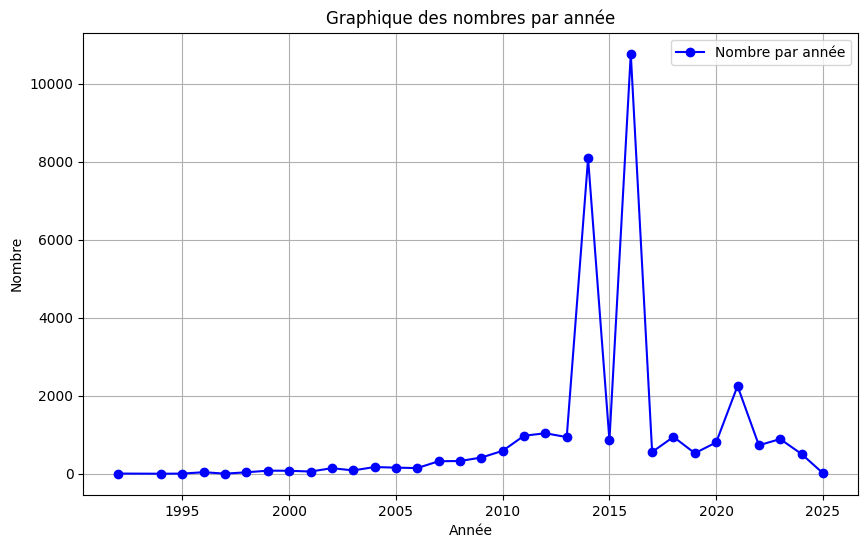

In [10]:
# Séparer les années et les nombres en deux listes
import matplotlib.pyplot as plt
list_annee, list_nb = zip(*sorted_discovery_counts)
list_annee = list(list_annee)
list_nb = list(list_nb)

# Tracer le graphique
plt.figure(figsize=(10, 6))
plt.plot(list_annee, list_nb, marker='o', linestyle='-', color='b', label='Nombre par année')
plt.title("Graphique des nombres par année")
plt.xlabel("Année")
plt.ylabel("Nombre")
plt.grid(True)
plt.legend()
plt.show()

In [11]:
import math
# Définir les plages
def distance_category(distance):
    if distance <= 10:
        return "0-10"
    elif 10 < distance <= 50:
        return "10-50"
    elif 50 < distance <= 100:
        return "50-100"
    elif 100 < distance <= 500:
        return "100-500"
    else:
        return ">500"

# Calculer les catégories pour chaque planète
categories = [distance_category(item['sy_dist']) for item in data if item['sy_dist'] is not None]

# Compter les occurrences par catégorie
category_counts = Counter(categories)

# Afficher les résultats
for category, count in sorted(category_counts.items()):
    print(f"Plage {category} : {count} planètes")

Plage 0-10 : 279 planètes
Plage 10-50 : 2091 planètes
Plage 100-500 : 10716 planètes
Plage 50-100 : 1544 planètes
Plage >500 : 17294 planètes


In [12]:
result = dict(category_counts)
print(result)

{'50-100': 1544, '10-50': 2091, '0-10': 279, '>500': 17294, '100-500': 10716}


In [13]:
# Compter le nombre de 'pl_name' par 'discoverymethod'
method_counts = Counter(item['discoverymethod'] for item in data)

# Afficher les résultats
for method, count in method_counts.items():
    print(f"Méthode {method} : {count} planètes")

Méthode Radial Velocity : 2583 planètes
Méthode Transit : 29091 planètes
Méthode Imaging : 148 planètes
Méthode Microlensing : 580 planètes
Méthode Transit Timing Variations : 128 planètes
Méthode Orbital Brightness Modulation : 19 planètes
Méthode Pulsar Timing : 13 planètes
Méthode Astrometry : 5 planètes
Méthode Eclipse Timing Variations : 24 planètes
Méthode Pulsation Timing Variations : 2 planètes
Méthode Disk Kinematics : 1 planètes


In [14]:
result = dict(method_counts)
print(result)

{'Radial Velocity': 2583, 'Transit': 29091, 'Imaging': 148, 'Microlensing': 580, 'Transit Timing Variations': 128, 'Orbital Brightness Modulation': 19, 'Pulsar Timing': 13, 'Astrometry': 5, 'Eclipse Timing Variations': 24, 'Pulsation Timing Variations': 2, 'Disk Kinematics': 1}


In [15]:
from datetime import datetime

# Nettoyer les dates
for item in data:
    item['disc_pubdate'] = item['disc_pubdate'].strip()  # Enlever les espaces
    item['disc_pubdate'] = item['disc_pubdate'][0:7]  # Enlever les espaces
    if item['disc_pubdate'][-2:]=='00':
        #print(item['disc_pubdate'])
        #print(item['disc_pubdate'][0:5]+'01')
        item['disc_pubdate']=item['disc_pubdate'][0:5]+'01'
        

# Trier les données par 'disc_pubdate' en ordre décroissant
sorted_data = sorted(data, key=lambda x: datetime.strptime(x['disc_pubdate'], '%Y-%m'), reverse=True)

# Extraire les 10 premiers 'pl_name'
most_recent_names = [item['pl_name'] for item in sorted_data[:10]]

print(most_recent_names)

['Gaia-5 b', 'Gaia-4 b', 'HD 86728 b', 'HD 20794 f', 'TOI-5786 b', 'TOI-5108 b', 'TOI-6038 A b', 'TOI-6038 A b', 'TOI-5108 b', 'WASP-132 d']


In [16]:
most_recent_with_dates = [(item['pl_name'], item['disc_pubdate']) for item in sorted_data[:10]]
print(most_recent_with_dates)

[('Gaia-5 b', '2025-02'), ('Gaia-4 b', '2025-02'), ('HD 86728 b', '2025-01'), ('HD 20794 f', '2025-01'), ('TOI-5786 b', '2025-01'), ('TOI-5108 b', '2025-01'), ('TOI-6038 A b', '2025-01'), ('TOI-6038 A b', '2025-01'), ('TOI-5108 b', '2025-01'), ('WASP-132 d', '2025-01')]


In [17]:
urlexo_pllist= "https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+distinct+pl_name,disc_year,sy_dist,pl_bmasse,pl_rade,discoverymethod+from+ps+&format=json"


In [18]:
urlexo=urlexo_pllist
print(urlexo)
response = requests.get(urlexo)
data_pllist = response.json()
#print(data_pllist)

https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+distinct+pl_name,disc_year,sy_dist,pl_bmasse,pl_rade,discoverymethod+from+ps+&format=json


In [19]:
print(data_pllist[0:10])

[{'pl_name': '4 UMa b', 'disc_year': 2006, 'sy_dist': 73.4603, 'pl_bmasse': 2256.5, 'pl_rade': None, 'discoverymethod': 'Radial Velocity'}, {'pl_name': 'kap CrB b', 'disc_year': 2007, 'sy_dist': 30.0651, 'pl_bmasse': 591.1638, 'pl_rade': None, 'discoverymethod': 'Radial Velocity'}, {'pl_name': 'HD 81688 b', 'disc_year': 2007, 'sy_dist': 85.7183, 'pl_bmasse': 562.5, 'pl_rade': None, 'discoverymethod': 'Radial Velocity'}, {'pl_name': '81 Cet b', 'disc_year': 2008, 'sy_dist': 101.26, 'pl_bmasse': 1684.4, 'pl_rade': None, 'discoverymethod': 'Radial Velocity'}, {'pl_name': 'HD 75898 b', 'disc_year': 2007, 'sy_dist': 78.0505, 'pl_bmasse': 797.7533, 'pl_rade': None, 'discoverymethod': 'Radial Velocity'}, {'pl_name': 'GJ 667 C f', 'disc_year': 2013, 'sy_dist': 7.24396, 'pl_bmasse': 2.7, 'pl_rade': None, 'discoverymethod': 'Radial Velocity'}, {'pl_name': 'Kepler-337 b', 'disc_year': 2014, 'sy_dist': 677.975, 'pl_bmasse': None, 'pl_rade': 1.3, 'discoverymethod': 'Transit'}, {'pl_name': 'GJ 667 C

In [20]:
unique_data = list({(item['pl_name'], item['disc_year'], item['sy_dist'], item['discoverymethod'], item['pl_bmasse'], item['pl_rade']) for item in data})


In [21]:
print(len(unique_data))

27275


In [22]:
unique_data = list({(item['pl_name']) for item in data_pllist})
print(len(unique_data))

5834


In [23]:
print(unique_data[:10])

['Kepler-608 b', 'OGLE-2019-BLG-0960L b', '75 Cet b', 'Kepler-1752 b', 'Kepler-281 c', 'Kepler-1222 b', 'Kepler-810 b', 'OGLE-2006-BLG-284L A b', 'Kepler-1042 b', 'Kepler-1274 b']


In [24]:
unique_data = list({(item['pl_name'],  item['discoverymethod'] ,item['pl_bmasse']) for item in data_pllist})
print(len(unique_data))

10441


In [25]:
urlexo_pllist= "https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+distinct+pl_name,disc_year,sy_dist,pl_bmasse,pl_rade,\
discoverymethod\
+from+ps+order+by+pl_name+&format=json"

In [28]:
unique_data = list({(item['pl_name'],  item['discoverymethod'] ,item['pl_bmasse']) for item in data_pllist[0:100]})
print(len(unique_data))

97


In [29]:
valid_planets = [planet for planet in data_pllist if planet.get('sy_dist') is not None]

In [30]:
print(valid_planets[:10])

[{'pl_name': '4 UMa b', 'disc_year': 2006, 'sy_dist': 73.4603, 'pl_bmasse': 2256.5, 'pl_rade': None, 'discoverymethod': 'Radial Velocity'}, {'pl_name': 'kap CrB b', 'disc_year': 2007, 'sy_dist': 30.0651, 'pl_bmasse': 591.1638, 'pl_rade': None, 'discoverymethod': 'Radial Velocity'}, {'pl_name': 'HD 81688 b', 'disc_year': 2007, 'sy_dist': 85.7183, 'pl_bmasse': 562.5, 'pl_rade': None, 'discoverymethod': 'Radial Velocity'}, {'pl_name': '81 Cet b', 'disc_year': 2008, 'sy_dist': 101.26, 'pl_bmasse': 1684.4, 'pl_rade': None, 'discoverymethod': 'Radial Velocity'}, {'pl_name': 'HD 75898 b', 'disc_year': 2007, 'sy_dist': 78.0505, 'pl_bmasse': 797.7533, 'pl_rade': None, 'discoverymethod': 'Radial Velocity'}, {'pl_name': 'GJ 667 C f', 'disc_year': 2013, 'sy_dist': 7.24396, 'pl_bmasse': 2.7, 'pl_rade': None, 'discoverymethod': 'Radial Velocity'}, {'pl_name': 'Kepler-337 b', 'disc_year': 2014, 'sy_dist': 677.975, 'pl_bmasse': None, 'pl_rade': 1.3, 'discoverymethod': 'Transit'}, {'pl_name': 'GJ 667 C

In [31]:
sorted_planets = sorted(valid_planets, key=lambda x: x['sy_dist'])

In [32]:
closest_planets = sorted_planets[:10]

In [33]:
print(closest_planets)

[{'pl_name': 'Proxima Cen b', 'disc_year': 2016, 'sy_dist': 1.30119, 'pl_bmasse': None, 'pl_rade': None, 'discoverymethod': 'Radial Velocity'}, {'pl_name': 'Proxima Cen b', 'disc_year': 2016, 'sy_dist': 1.30119, 'pl_bmasse': 1.27, 'pl_rade': None, 'discoverymethod': 'Radial Velocity'}, {'pl_name': 'Proxima Cen b', 'disc_year': 2016, 'sy_dist': 1.30119, 'pl_bmasse': 1.0, 'pl_rade': None, 'discoverymethod': 'Radial Velocity'}, {'pl_name': 'Proxima Cen b', 'disc_year': 2016, 'sy_dist': 1.30119, 'pl_bmasse': 1.07, 'pl_rade': None, 'discoverymethod': 'Radial Velocity'}, {'pl_name': 'Barnard b', 'disc_year': 2024, 'sy_dist': 1.82655, 'pl_bmasse': 0.37, 'pl_rade': None, 'discoverymethod': 'Radial Velocity'}, {'pl_name': 'eps Eri b', 'disc_year': 2000, 'sy_dist': 3.2026, 'pl_bmasse': 492.6365, 'pl_rade': None, 'discoverymethod': 'Radial Velocity'}, {'pl_name': 'eps Eri b', 'disc_year': 2000, 'sy_dist': 3.2026, 'pl_bmasse': 209.76675, 'pl_rade': None, 'discoverymethod': 'Radial Velocity'}, {'pl

In [34]:
len(sorted_planets)

26731

In [35]:
print(sorted_planets[:10])

[{'pl_name': 'Proxima Cen b', 'disc_year': 2016, 'sy_dist': 1.30119, 'pl_bmasse': None, 'pl_rade': None, 'discoverymethod': 'Radial Velocity'}, {'pl_name': 'Proxima Cen b', 'disc_year': 2016, 'sy_dist': 1.30119, 'pl_bmasse': 1.27, 'pl_rade': None, 'discoverymethod': 'Radial Velocity'}, {'pl_name': 'Proxima Cen b', 'disc_year': 2016, 'sy_dist': 1.30119, 'pl_bmasse': 1.0, 'pl_rade': None, 'discoverymethod': 'Radial Velocity'}, {'pl_name': 'Proxima Cen b', 'disc_year': 2016, 'sy_dist': 1.30119, 'pl_bmasse': 1.07, 'pl_rade': None, 'discoverymethod': 'Radial Velocity'}, {'pl_name': 'Barnard b', 'disc_year': 2024, 'sy_dist': 1.82655, 'pl_bmasse': 0.37, 'pl_rade': None, 'discoverymethod': 'Radial Velocity'}, {'pl_name': 'eps Eri b', 'disc_year': 2000, 'sy_dist': 3.2026, 'pl_bmasse': 492.6365, 'pl_rade': None, 'discoverymethod': 'Radial Velocity'}, {'pl_name': 'eps Eri b', 'disc_year': 2000, 'sy_dist': 3.2026, 'pl_bmasse': 209.76675, 'pl_rade': None, 'discoverymethod': 'Radial Velocity'}, {'pl

In [36]:
import requests
urlexo_pllist = "https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+distinct+pl_name,disc_year,sy_dist,discoverymethod,pl_bmasse,pl_rade\
+from+ps+&format=json"
response = requests.get(urlexo_pllist)
data_pllist = response.json()

In [37]:
print(urlexo_pllist)
response = requests.get(urlexo_pllist)
data = response.json()
print(data[0])

https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+distinct+pl_name,disc_year,sy_dist,discoverymethod,pl_bmasse,pl_rade+from+ps+&format=json
{'pl_name': 'bet Pic b', 'disc_year': 2008, 'sy_dist': 19.7442, 'discoverymethod': 'Imaging', 'pl_bmasse': None, 'pl_rade': None}


In [38]:
aggregated_data = {}
for row in data_pllist:
    pl_name = row['pl_name']
    if pl_name not in aggregated_data:
        aggregated_data[pl_name] = row
    else:
        for key in row:
            if key != 'pl_name' and row[key] is not None:
                # Conserver la valeur maximale pour les autres colonnes
                aggregated_data[pl_name][key] = max(aggregated_data[pl_name][key], row[key]) if aggregated_data[pl_name][key] is not None else row[key]


In [39]:
print(aggregated_data['bet Pic b'])

{'pl_name': 'bet Pic b', 'disc_year': 2008, 'sy_dist': 19.7442, 'discoverymethod': 'Imaging', 'pl_bmasse': 6356.0, 'pl_rade': 18.495}


In [40]:
print(aggregated_data['Proxima Cen b'])

{'pl_name': 'Proxima Cen b', 'disc_year': 2016, 'sy_dist': 1.30119, 'discoverymethod': 'Radial Velocity', 'pl_bmasse': 1.27, 'pl_rade': None}


In [41]:
urlexo_pllist1 = "https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+distinct+pl_name,disc_year,sy_dist,discoverymethod,pl_bmasse,pl_rade\
,pl_orbper,pl_eqt,pl_dens+from+ps+where+pl_name='Proxima Cen b'&format=json"

In [45]:
response1 = requests.get(urlexo_pllist1)
data1 = response1.json()
print(data1[0])

{'pl_name': 'Proxima Cen b', 'disc_year': 2016, 'sy_dist': 1.30119, 'discoverymethod': 'Radial Velocity', 'pl_bmasse': 1.27, 'pl_rade': None, 'pl_orbper': 11.186, 'pl_eqt': 234.0, 'pl_dens': None}


In [46]:
len(data1)

4

In [47]:
import requests
import matplotlib.pyplot as plt
urlexo_pllist = "https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+distinct+pl_name,disc_year,sy_dist,discoverymethod,pl_bmasse,pl_rade\
,pl_orbper,pl_eqt,pl_dens+from+ps+&format=json"
response = requests.get(urlexo_pllist)
data_pllist = response.json()

In [48]:
aggregated_data = {}
for row in data_pllist:
    pl_name = row['pl_name']
    if pl_name not in aggregated_data:
        aggregated_data[pl_name] = row
    else:
        for key in row:
            if key != 'pl_name' and row[key] is not None:
                # Conserver la valeur maximale pour les autres colonnes
                aggregated_data[pl_name][key] = max(aggregated_data[pl_name][key], row[key]) if aggregated_data[pl_name][key] is not None else row[key]


In [49]:
len(aggregated_data)

5834

In [50]:
print(aggregated_data['bet Pic b'])

{'pl_name': 'bet Pic b', 'disc_year': 2008, 'sy_dist': 19.7442, 'discoverymethod': 'Imaging', 'pl_bmasse': 6356.0, 'pl_rade': 18.495, 'pl_orbper': 8617.50952, 'pl_eqt': 1650.0, 'pl_dens': None}


In [51]:
type(aggregated_data)

dict

In [52]:
# Convertir en une liste de tuples pour MDDataTable
data_table_tuple = [
    (row['pl_name'], row['disc_year'], row['sy_dist'], row['discoverymethod'], row['pl_bmasse'], row['pl_rade'], row['pl_orbper'], row['pl_dens'], row['pl_eqt'])
    for row in aggregated_data.values()
]

In [53]:
data_table_tuple[0:5]

[('OGLE-TR-10 b',
  2004,
  1344.97,
  'Transit',
  359.1479,
  19.279,
  3.1014,
  0.815,
  1702.0),
 ('bet Pic b',
  2008,
  19.7442,
  'Imaging',
  6356.0,
  18.495,
  8617.50952,
  None,
  1650.0),
 ('HD 180314 b',
  2010,
  122.362,
  'Radial Velocity',
  7216.92964,
  None,
  396.03,
  None,
  None),
 ('gam Lib b',
  2018,
  47.4017,
  'Radial Velocity',
  357.87479,
  None,
  415.2,
  None,
  None),
 ('gam Lib c',
  2018,
  47.4017,
  'Radial Velocity',
  1662.5604,
  None,
  966.49,
  None,
  None)]

In [54]:
data_table_tuple[0]

('OGLE-TR-10 b',
 2004,
 1344.97,
 'Transit',
 359.1479,
 19.279,
 3.1014,
 0.815,
 1702.0)

In [55]:
#cle associés
keys = ["pl_name","disc_year","sy_dist","discoverymethod","pl_bmasse","pl_rade","pl_orbper","pl_eqt","pl_dens"]

#conversion en liste de dict
data_table_dict = [dict(zip(keys, tpl)) for tpl in data_table_tuple]

In [56]:
data_table_dict[0:3]

[{'pl_name': 'OGLE-TR-10 b',
  'disc_year': 2004,
  'sy_dist': 1344.97,
  'discoverymethod': 'Transit',
  'pl_bmasse': 359.1479,
  'pl_rade': 19.279,
  'pl_orbper': 3.1014,
  'pl_eqt': 0.815,
  'pl_dens': 1702.0},
 {'pl_name': 'bet Pic b',
  'disc_year': 2008,
  'sy_dist': 19.7442,
  'discoverymethod': 'Imaging',
  'pl_bmasse': 6356.0,
  'pl_rade': 18.495,
  'pl_orbper': 8617.50952,
  'pl_eqt': None,
  'pl_dens': 1650.0},
 {'pl_name': 'HD 180314 b',
  'disc_year': 2010,
  'sy_dist': 122.362,
  'discoverymethod': 'Radial Velocity',
  'pl_bmasse': 7216.92964,
  'pl_rade': None,
  'pl_orbper': 396.03,
  'pl_eqt': None,
  'pl_dens': None}]

In [57]:
len(data_table_dict)

5834

In [58]:
# Extraction des tuples (pl_name, disc_year) sans doublons
unique_data = list(set(map(lambda x: (x['pl_name'], x['disc_year']), data_table_dict)))

print(unique_data[0:10])

[('K2-149 b', 2018), ('Kepler-380 b', 2014), ('K2-68 b', 2016), ('K2-250 b', 2018), ('BD+20 2457 b', 2009), ('HD 56414 b', 2022), ('Kepler-1894 b', 2021), ('K2-219 c', 2018), ('WASP-99 b', 2014), ('TOI-2485 b', 2024)]


In [59]:
from collections import Counter
# Compter le nombre de découvertes par année
discovery_counts = Counter(item['disc_year'] for item in data_table_dict)

# Trier les résultats par année
sorted_discovery_counts = sorted(discovery_counts.items())

print(sorted_discovery_counts)

[(1992, 2), (1994, 1), (1995, 1), (1996, 6), (1997, 1), (1998, 6), (1999, 13), (2000, 16), (2001, 12), (2002, 29), (2003, 22), (2004, 27), (2005, 36), (2006, 31), (2007, 52), (2008, 64), (2009, 94), (2010, 98), (2011, 134), (2012, 139), (2013, 127), (2014, 874), (2015, 155), (2016, 1496), (2017, 153), (2018, 312), (2019, 197), (2020, 234), (2021, 554), (2022, 363), (2023, 324), (2024, 250), (2025, 11)]


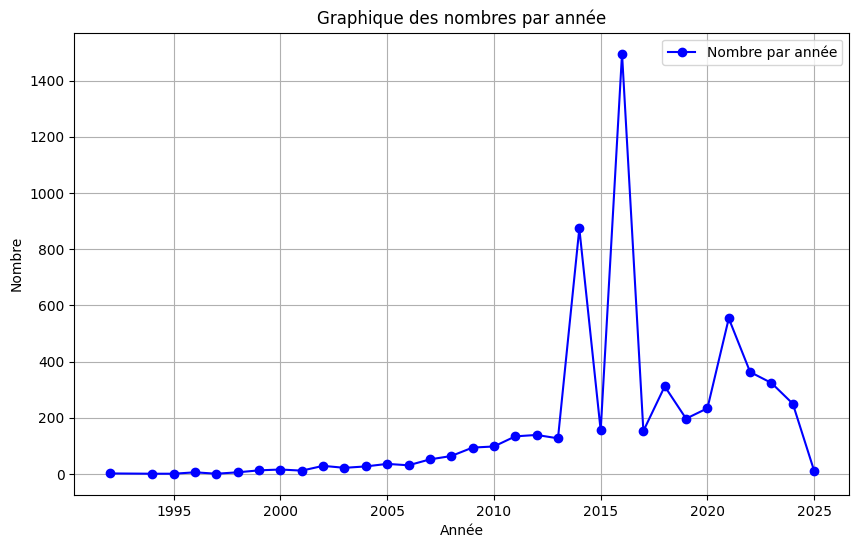

In [60]:
# Séparer les années et les nombres en deux listes
list_annee, list_nb = zip(*sorted_discovery_counts)
list_annee = list(list_annee)
list_nb = list(list_nb)

# Tracer le graphique
plt.figure(figsize=(10, 6))
plt.plot(list_annee, list_nb, marker='o', linestyle='-', color='b', label='Nombre par année')
plt.title("Graphique des nombres par année")
plt.xlabel("Année")
plt.ylabel("Nombre")
plt.grid(True)
plt.legend()
plt.show()

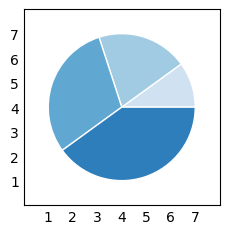

In [61]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery-nogrid')


# make data
x = [1, 2, 3, 4]
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(x)))

# plot
fig, ax = plt.subplots()
ax.pie(x, colors=colors, radius=3, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

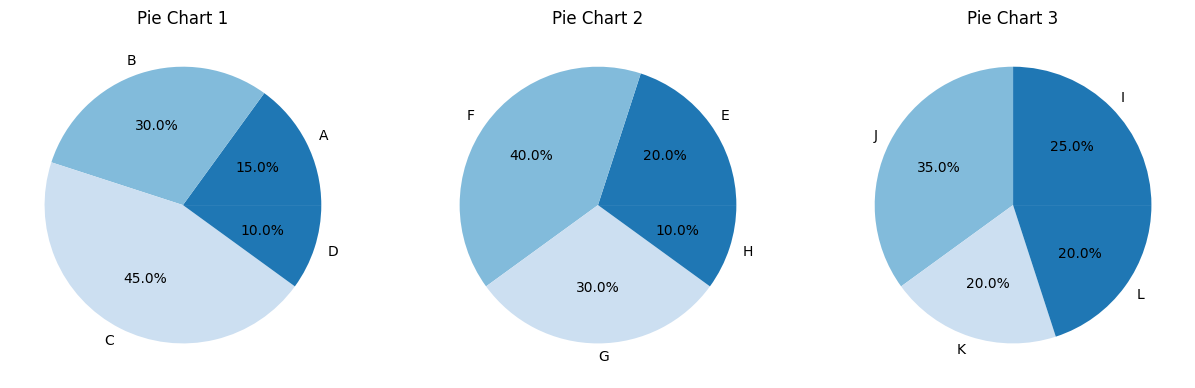

In [62]:
import matplotlib.pyplot as plt

# Data for each pie chart
data1 = [15, 30, 45, 10]
data2 = [20, 40, 30, 10]
data3 = [25, 35, 20, 20]

# Create a figure with 3 subplots (axes)
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

# Plot each pie chart on a separate axis
axs[0].pie(data1, labels=['A', 'B', 'C', 'D'], autopct='%1.1f%%')
axs[1].pie(data2, labels=['E', 'F', 'G', 'H'], autopct='%1.1f%%')
axs[2].pie(data3, labels=['I', 'J', 'K', 'L'], autopct='%1.1f%%')

# Set title and labels for each axis
axs[0].set_title('Pie Chart 1')
axs[1].set_title('Pie Chart 2')
axs[2].set_title('Pie Chart 3')

plt.show()

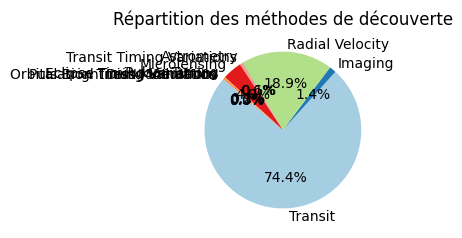

In [63]:

# Compter les occurrences de chaque méthode de découverte
discovery_methods = [item['discoverymethod'] for item in data_table_dict]
method_counts = Counter(discovery_methods)

# Préparer les données pour le graphique
labels = list(method_counts.keys())
sizes = list(method_counts.values())

# Tracer le graphique en secteurs
plt.figure(figsize=(4, 2))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Répartition des méthodes de découverte")
plt.show()

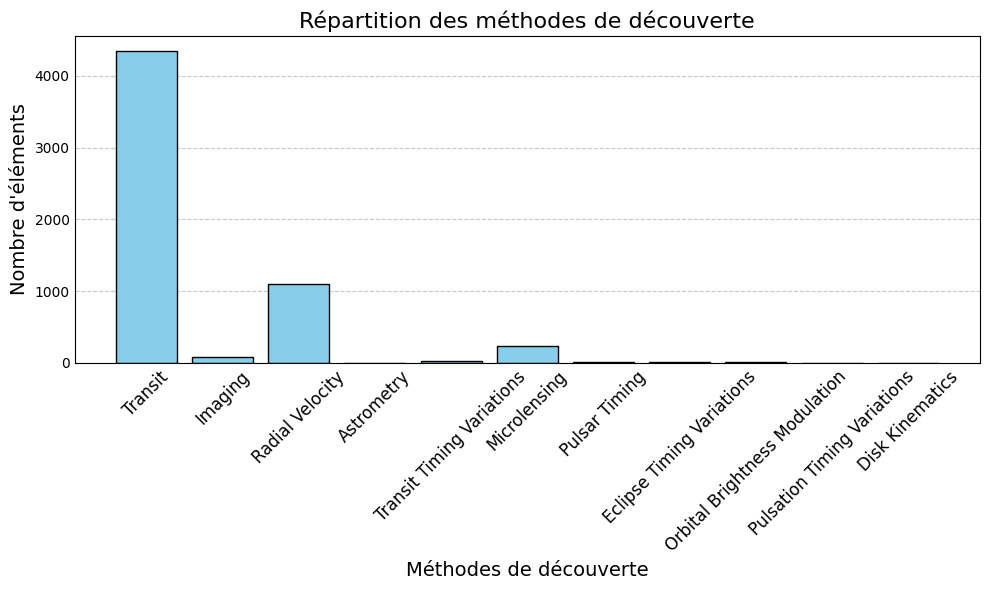

In [64]:
# Compter les occurrences de chaque méthode de découverte
discovery_methods = [item['discoverymethod'] for item in data_table_dict]
method_counts = Counter(discovery_methods)

# Préparer les données pour le graphique
labels = list(method_counts.keys())
counts = list(method_counts.values())

# Tracer le graphique à barres
plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='skyblue', edgecolor='black')
plt.title("Répartition des méthodes de découverte", fontsize=16)
plt.xlabel("Méthodes de découverte", fontsize=14)
plt.ylabel("Nombre d'éléments", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

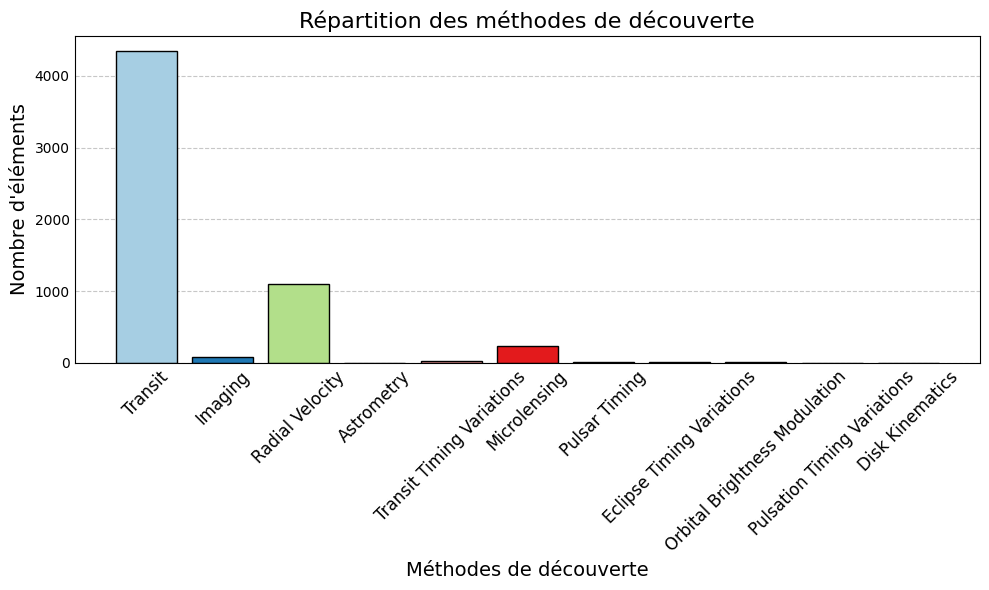

In [65]:

# Compter les occurrences de chaque méthode de découverte
discovery_methods = [item['discoverymethod'] for item in data_table_dict]
method_counts = Counter(discovery_methods)

# Préparer les données pour le graphique
labels = list(method_counts.keys())
counts = list(method_counts.values())

# Générer des couleurs uniques pour chaque barre
colors = plt.cm.Paired.colors[:len(labels)]  # Palette de couleurs

# Tracer le graphique à barres
plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color=colors, edgecolor='black')
plt.title("Répartition des méthodes de découverte", fontsize=16)
plt.xlabel("Méthodes de découverte", fontsize=14)
plt.ylabel("Nombre d'éléments", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


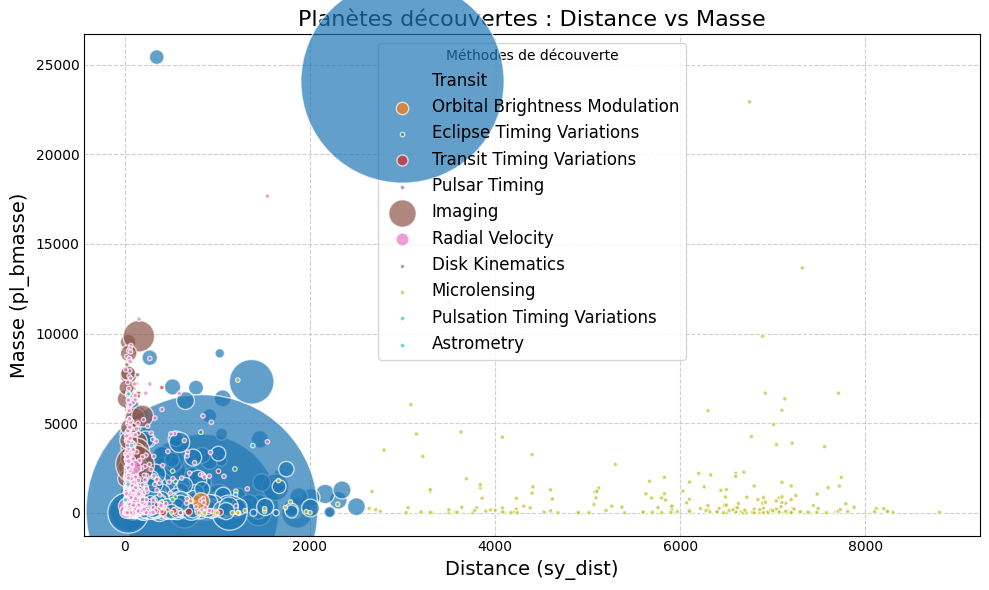

In [66]:
# Remplacer les valeurs None pour pl_rade par une valeur par défaut
for item in data_table_dict:
    if item['pl_rade'] is None:
        item['pl_rade'] = 1  # Remplacez par une valeur par défaut

# Extraire les données
x = [item['sy_dist'] for item in data_table_dict]
y = [item['pl_bmasse'] for item in data_table_dict]
sizes = [item['pl_rade'] * 10 for item in data_table_dict]  # Ajuster la taille des points
methods = [item['discoverymethod'] for item in data_table_dict]

# Générer une palette de couleurs pour les méthodes
unique_methods = list(set(methods))
colors = {method: plt.cm.tab10(i) for i, method in enumerate(unique_methods)}

# Tracer le graphique
plt.figure(figsize=(10, 6))
for method in unique_methods:
    # Filtrer les données par méthode
    x_vals = [x[i] for i in range(len(x)) if methods[i] == method]
    y_vals = [y[i] for i in range(len(y)) if methods[i] == method]
    size_vals = [sizes[i] for i in range(len(sizes)) if methods[i] == method]
    plt.scatter(x_vals, y_vals, s=size_vals, color=colors[method], label=method, alpha=0.7, edgecolors='w')

# Ajouter des détails au graphique
plt.title("Planètes découvertes : Distance vs Masse", fontsize=16)
plt.xlabel("Distance (sy_dist)", fontsize=14)
plt.ylabel("Masse (pl_bmasse)", fontsize=14)
plt.legend(title="Méthodes de découverte", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Afficher le graphique
plt.show()

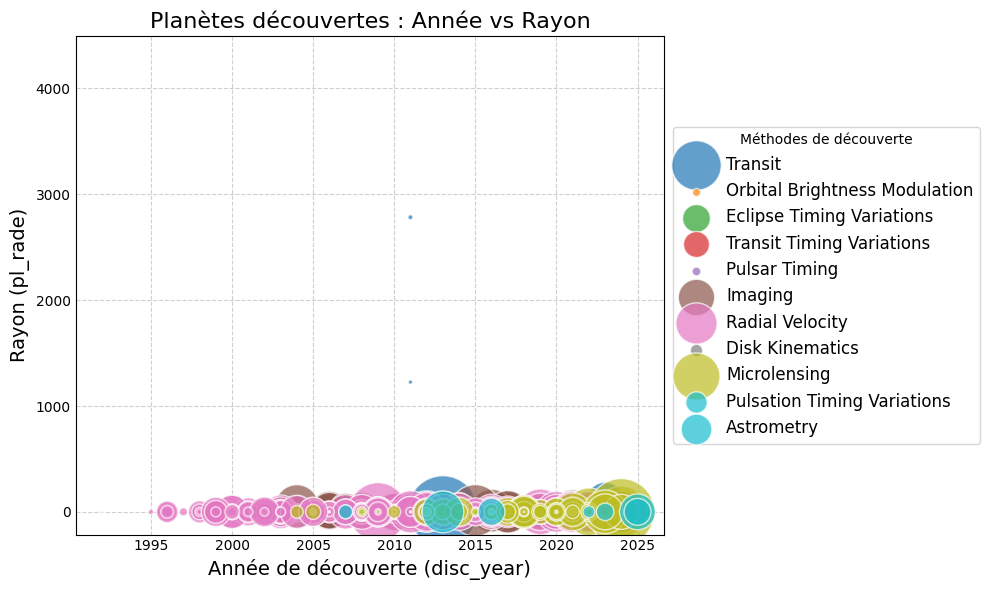

In [67]:


# Remplacer les valeurs None pour pl_rade et pl_bmasse par des valeurs par défaut
for item in data_table_dict:
    if item['pl_rade'] is None:
        item['pl_rade'] = 1  # Remplacez par une valeur par défaut pour le rayon
    if item['pl_bmasse'] is None:
        item['pl_bmasse'] = 1  # Remplacez par une valeur par défaut pour la masse

# Extraire les données
x = [item['disc_year'] for item in data_table_dict]
y = [item['pl_rade'] for item in data_table_dict]
sizes = [item['pl_bmasse'] / 10 for item in data_table_dict]  # Ajuster la taille des points
methods = [item['discoverymethod'] for item in data_table_dict]

# Générer une palette de couleurs pour les méthodes
unique_methods = list(set(methods))
colors = {method: plt.cm.tab10(i) for i, method in enumerate(unique_methods)}

# Tracer le graphique
plt.figure(figsize=(10, 6))
for method in unique_methods:
    # Filtrer les données par méthode
    x_vals = [x[i] for i in range(len(x)) if methods[i] == method]
    y_vals = [y[i] for i in range(len(y)) if methods[i] == method]
    size_vals = [sizes[i] for i in range(len(sizes)) if methods[i] == method]
    plt.scatter(x_vals, y_vals, s=size_vals, color=colors[method], label=method, alpha=0.7, edgecolors='w')

# Ajouter des détails au graphique
plt.title("Planètes découvertes : Année vs Rayon", fontsize=16)
plt.xlabel("Année de découverte (disc_year)", fontsize=14)
plt.ylabel("Rayon (pl_rade)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

# Placer la légende sur la droite
plt.legend(title="Méthodes de découverte", fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5))

# Ajuster l'espacement
plt.tight_layout()

# Afficher le graphique
plt.show()

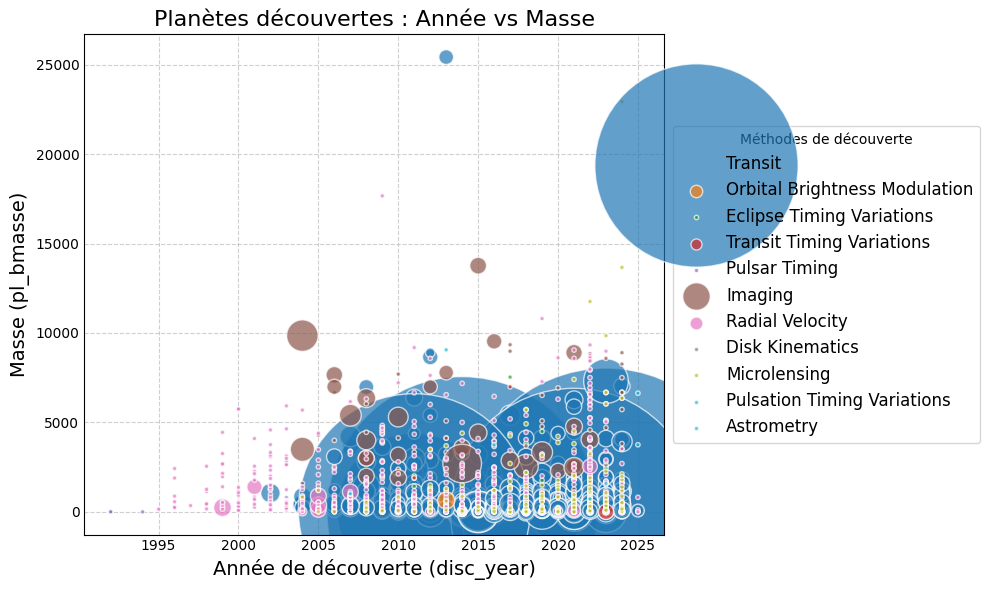

In [68]:

# Remplacer les valeurs None pour pl_rade et pl_bmasse par des valeurs par défaut
for item in data_table_dict:
    if item['pl_rade'] is None:
        item['pl_rade'] = 1  # Remplacez par une valeur par défaut pour le rayon
    if item['pl_bmasse'] is None:
        item['pl_bmasse'] = 1  # Remplacez par une valeur par défaut pour la masse

# Extraire les données
x = [item['disc_year'] for item in data_table_dict]
y = [item['pl_bmasse'] for item in data_table_dict]
sizes = [item['pl_rade'] * 10 for item in data_table_dict]  # Ajuster la taille des points
methods = [item['discoverymethod'] for item in data_table_dict]

# Générer une palette de couleurs pour les méthodes
unique_methods = list(set(methods))
colors = {method: plt.cm.tab10(i) for i, method in enumerate(unique_methods)}

# Tracer le graphique
plt.figure(figsize=(10, 6))
for method in unique_methods:
    # Filtrer les données par méthode
    x_vals = [x[i] for i in range(len(x)) if methods[i] == method]
    y_vals = [y[i] for i in range(len(y)) if methods[i] == method]
    size_vals = [sizes[i] for i in range(len(sizes)) if methods[i] == method]
    plt.scatter(x_vals, y_vals, s=size_vals, color=colors[method], label=method, alpha=0.7, edgecolors='w')

# Ajouter des détails au graphique
plt.title("Planètes découvertes : Année vs Masse", fontsize=16)
plt.xlabel("Année de découverte (disc_year)", fontsize=14)
plt.ylabel("Masse (pl_bmasse)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

# Placer la légende sur la droite
plt.legend(title="Méthodes de découverte", fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5))

# Ajuster l'espacement
plt.tight_layout()

# Afficher le graphique
plt.show()

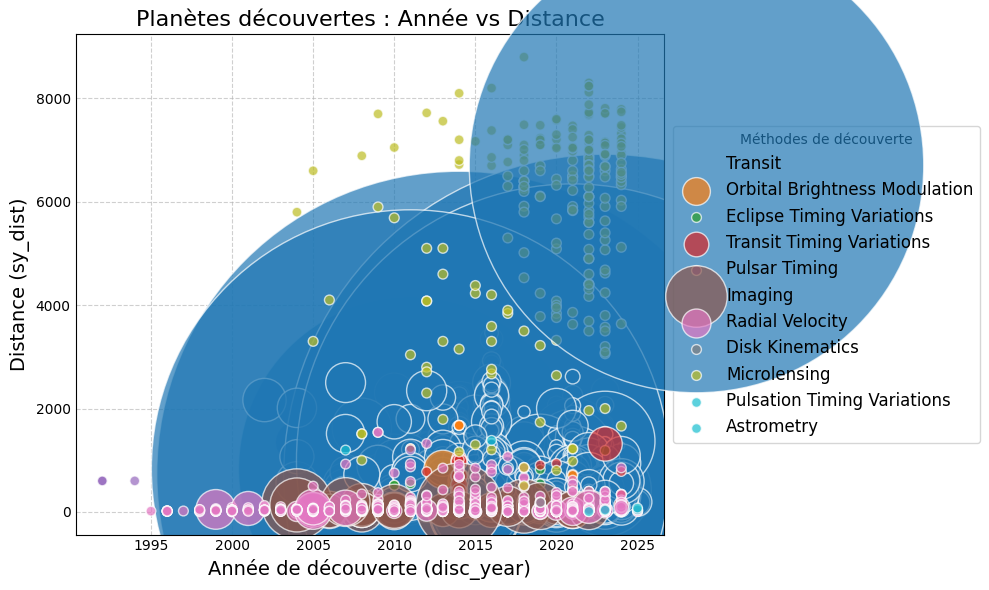

In [69]:
# Remplacer les valeurs None pour pl_rade par une valeur par défaut
for item in data_table_dict:
    if item['pl_rade'] is None:
        item['pl_rade'] = 1  # Valeur par défaut pour le rayon

# Extraire les données
x = [item['disc_year'] for item in data_table_dict]
y = [item['sy_dist'] for item in data_table_dict]
sizes = [item['pl_rade'] * 50 for item in data_table_dict]  # Ajuster la taille des points
methods = [item['discoverymethod'] for item in data_table_dict]

# Générer une palette de couleurs pour les méthodes
unique_methods = list(set(methods))
colors = {method: plt.cm.tab10(i) for i, method in enumerate(unique_methods)}

# Tracer le graphique
plt.figure(figsize=(10, 6))
for method in unique_methods:
    # Filtrer les données par méthode
    x_vals = [x[i] for i in range(len(x)) if methods[i] == method]
    y_vals = [y[i] for i in range(len(y)) if methods[i] == method]
    size_vals = [sizes[i] for i in range(len(sizes)) if methods[i] == method]
    plt.scatter(x_vals, y_vals, s=size_vals, color=colors[method], label=method, alpha=0.7, edgecolors='w')

# Ajouter des détails au graphique
plt.title("Planètes découvertes : Année vs Distance", fontsize=16)
plt.xlabel("Année de découverte (disc_year)", fontsize=14)
plt.ylabel("Distance (sy_dist)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

# Placer la légende sur la droite
plt.legend(title="Méthodes de découverte", fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5))

# Ajuster l'espacement
plt.tight_layout()

# Afficher le graphique
plt.show()

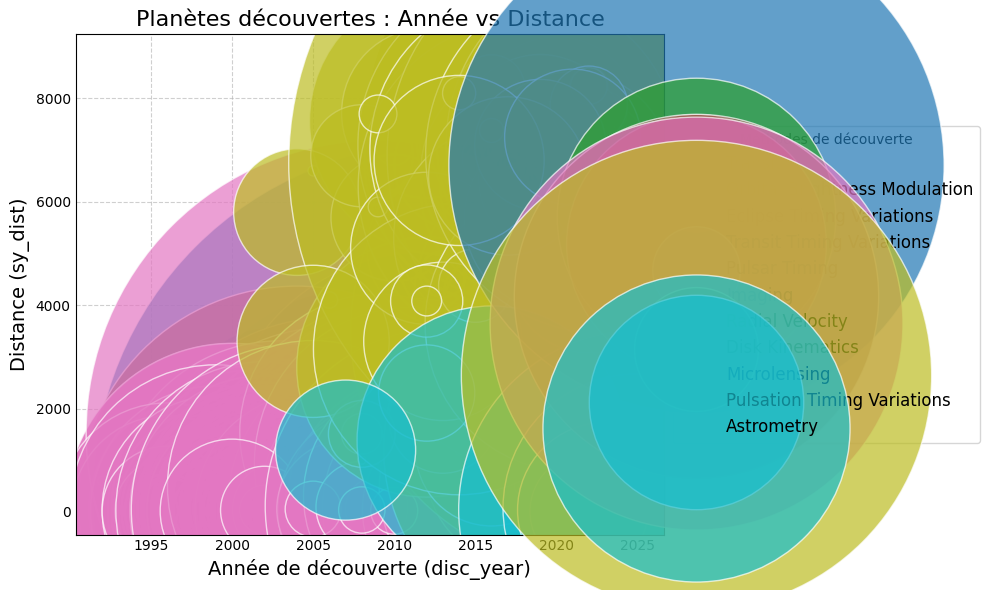

In [70]:

# Remplacer les valeurs None pour pl_bmasse par une valeur par défaut
for item in data_table_dict:
    if item['pl_bmasse'] is None:
        item['pl_bmasse'] = 1  # Valeur par défaut pour la masse

# Extraire les données
x = [item['disc_year'] for item in data_table_dict]
y = [item['sy_dist'] for item in data_table_dict]
sizes = [item['pl_bmasse'] * 10 for item in data_table_dict]  # Ajuster la taille des points
methods = [item['discoverymethod'] for item in data_table_dict]

# Générer une palette de couleurs pour les méthodes
unique_methods = list(set(methods))
colors = {method: plt.cm.tab10(i) for i, method in enumerate(unique_methods)}

# Tracer le graphique
plt.figure(figsize=(10, 6))
for method in unique_methods:
    # Filtrer les données par méthode
    x_vals = [x[i] for i in range(len(x)) if methods[i] == method]
    y_vals = [y[i] for i in range(len(y)) if methods[i] == method]
    size_vals = [sizes[i] for i in range(len(sizes)) if methods[i] == method]
    plt.scatter(x_vals, y_vals, s=size_vals, color=colors[method], label=method, alpha=0.7, edgecolors='w')

# Ajouter des détails au graphique
plt.title("Planètes découvertes : Année vs Distance", fontsize=16)
plt.xlabel("Année de découverte (disc_year)", fontsize=14)
plt.ylabel("Distance (sy_dist)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

# Placer la légende sur la droite
plt.legend(title="Méthodes de découverte", fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5))

# Ajuster l'espacement
plt.tight_layout()

# Afficher le graphique
plt.show()

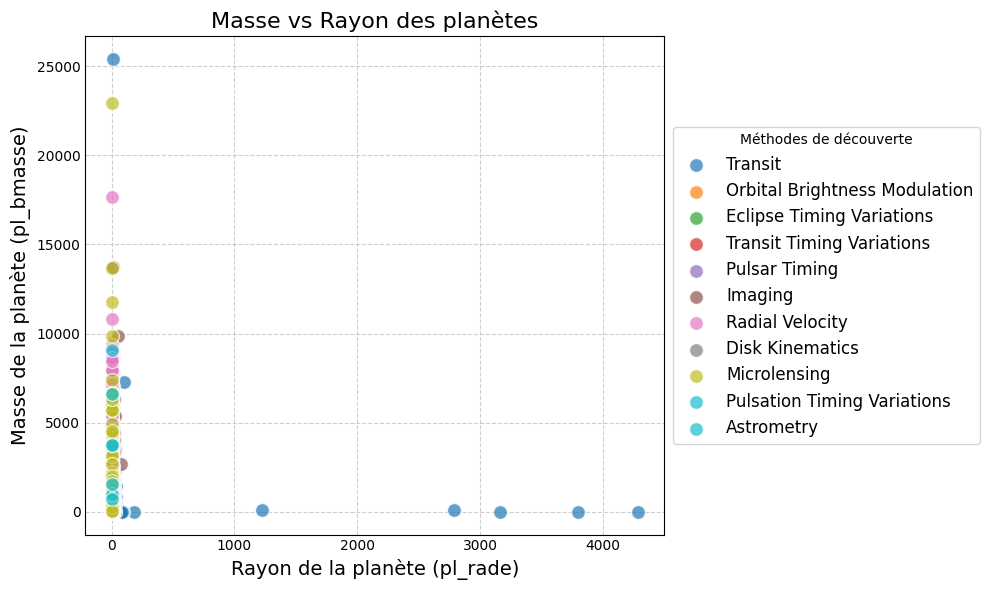

In [71]:

# Extraire les données
x = [item['pl_rade'] for item in data_table_dict]  # Rayon (X)
y = [item['pl_bmasse'] for item in data_table_dict]  # Masse (Y)
methods = [item['discoverymethod'] for item in data_table_dict]  # Méthode de découverte

# Taille fixe des points
size = 100  # Taille fixe des points

# Générer une palette de couleurs pour les méthodes
unique_methods = list(set(methods))
colors = {method: plt.cm.tab10(i) for i, method in enumerate(unique_methods)}

# Tracer le graphique
plt.figure(figsize=(10, 6))

for method in unique_methods:
    # Filtrer les données par méthode
    x_vals = [x[i] for i in range(len(x)) if methods[i] == method]
    y_vals = [y[i] for i in range(len(y)) if methods[i] == method]
    plt.scatter(x_vals, y_vals, s=size, color=colors[method], label=method, alpha=0.7, edgecolors='w')

# Ajouter des détails au graphique
plt.title("Masse vs Rayon des planètes", fontsize=16)
plt.xlabel("Rayon de la planète (pl_rade)", fontsize=14)
plt.ylabel("Masse de la planète (pl_bmasse)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

# Placer la légende sur la droite
plt.legend(title="Méthodes de découverte", fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5))

# Ajuster l'espacement
plt.tight_layout()

# Afficher le graphique
plt.show()

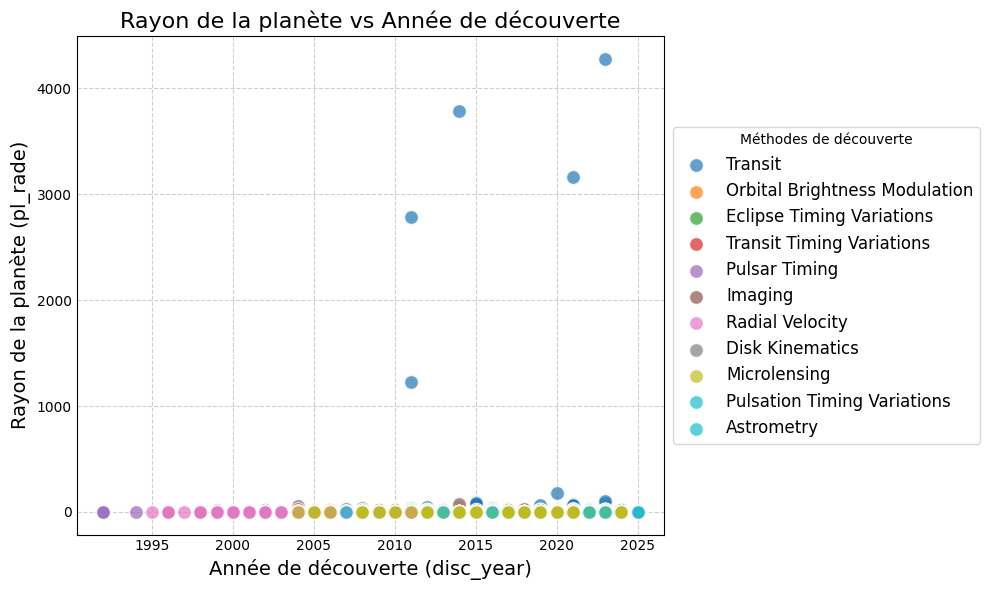

In [72]:

# Extraire les données
x = [item['disc_year'] for item in data_table_dict]  # Année de découverte (X)
y = [item['pl_rade'] for item in data_table_dict]  # Rayon de la planète (Y)
methods = [item['discoverymethod'] for item in data_table_dict]  # Méthode de découverte

# Taille fixe des points
size = 100  # Taille fixe des points

# Générer une palette de couleurs pour les méthodes
unique_methods = list(set(methods))
colors = {method: plt.cm.tab10(i) for i, method in enumerate(unique_methods)}

# Tracer le graphique
plt.figure(figsize=(10, 6))

for method in unique_methods:
    # Filtrer les données par méthode
    x_vals = [x[i] for i in range(len(x)) if methods[i] == method]
    y_vals = [y[i] for i in range(len(y)) if methods[i] == method]
    plt.scatter(x_vals, y_vals, s=size, color=colors[method], label=method, alpha=0.7, edgecolors='w')

# Ajouter des détails au graphique
plt.title("Rayon de la planète vs Année de découverte", fontsize=16)
plt.xlabel("Année de découverte (disc_year)", fontsize=14)
plt.ylabel("Rayon de la planète (pl_rade)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

# Placer la légende sur la droite
plt.legend(title="Méthodes de découverte", fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5))

# Ajuster l'espacement
plt.tight_layout()

# Afficher le graphique
plt.show()

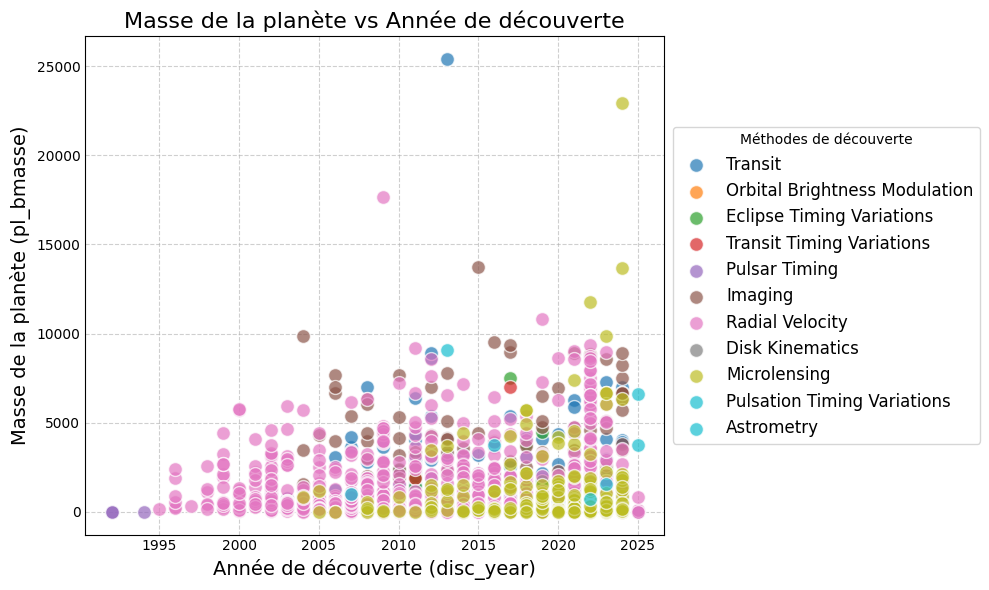

In [73]:

# Extraire les données
x = [item['disc_year'] for item in data_table_dict]  # Année de découverte (X)
y = [item['pl_bmasse'] for item in data_table_dict]  # Masse de la planète (Y)
methods = [item['discoverymethod'] for item in data_table_dict]  # Méthode de découverte

# Taille fixe des points
size = 100  # Taille fixe des points

# Générer une palette de couleurs pour les méthodes
unique_methods = list(set(methods))
colors = {method: plt.cm.tab10(i) for i, method in enumerate(unique_methods)}

# Tracer le graphique
plt.figure(figsize=(10, 6))

for method in unique_methods:
    # Filtrer les données par méthode
    x_vals = [x[i] for i in range(len(x)) if methods[i] == method]
    y_vals = [y[i] for i in range(len(y)) if methods[i] == method]
    plt.scatter(x_vals, y_vals, s=size, color=colors[method], label=method, alpha=0.7, edgecolors='w')

# Ajouter des détails au graphique
plt.title("Masse de la planète vs Année de découverte", fontsize=16)
plt.xlabel("Année de découverte (disc_year)", fontsize=14)
plt.ylabel("Masse de la planète (pl_bmasse)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

# Placer la légende sur la droite
plt.legend(title="Méthodes de découverte", fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5))

# Ajuster l'espacement
plt.tight_layout()

# Afficher le graphique
plt.show()

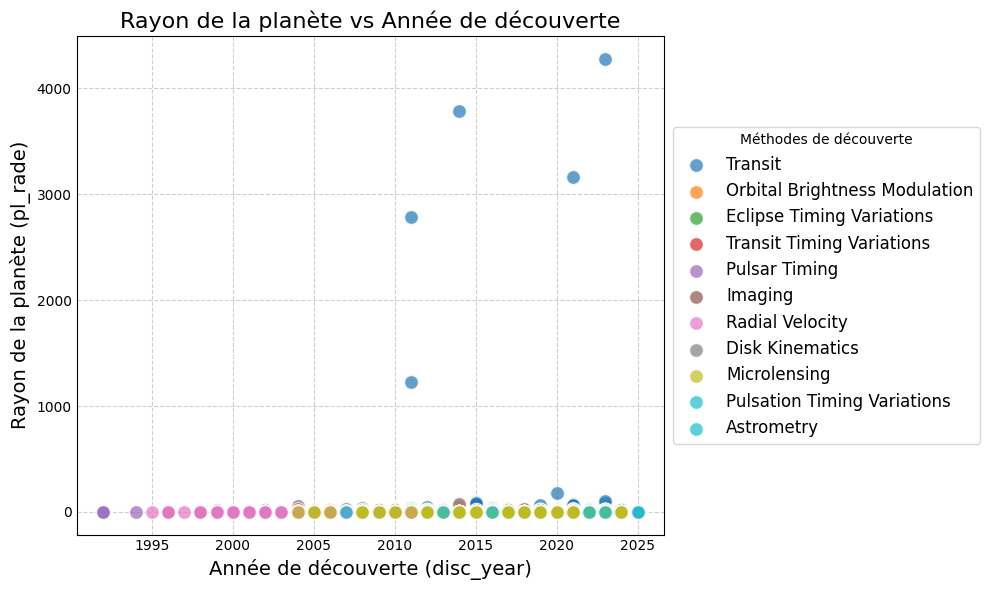

In [74]:
# Extraire les données
x = [item['disc_year'] for item in data_table_dict]  # Année de découverte (X)
y = [item['pl_rade'] for item in data_table_dict]  # Rayon de la planète (Y)
methods = [item['discoverymethod'] for item in data_table_dict]  # Méthode de découverte

# Taille fixe des points
size = 100  # Taille fixe des points

# Générer une palette de couleurs pour les méthodes
unique_methods = list(set(methods))
colors = {method: plt.cm.tab10(i) for i, method in enumerate(unique_methods)}

# Tracer le graphique
plt.figure(figsize=(10, 6))

for method in unique_methods:
    # Filtrer les données par méthode
    x_vals = [x[i] for i in range(len(x)) if methods[i] == method]
    y_vals = [y[i] for i in range(len(y)) if methods[i] == method]
    plt.scatter(x_vals, y_vals, s=size, color=colors[method], label=method, alpha=0.7, edgecolors='w')

# Ajouter des détails au graphique
plt.title("Rayon de la planète vs Année de découverte", fontsize=16)
plt.xlabel("Année de découverte (disc_year)", fontsize=14)
plt.ylabel("Rayon de la planète (pl_rade)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

# Placer la légende sur la droite
plt.legend(title="Méthodes de découverte", fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5))

# Ajuster l'espacement
plt.tight_layout()

# Afficher le graphique
plt.show()

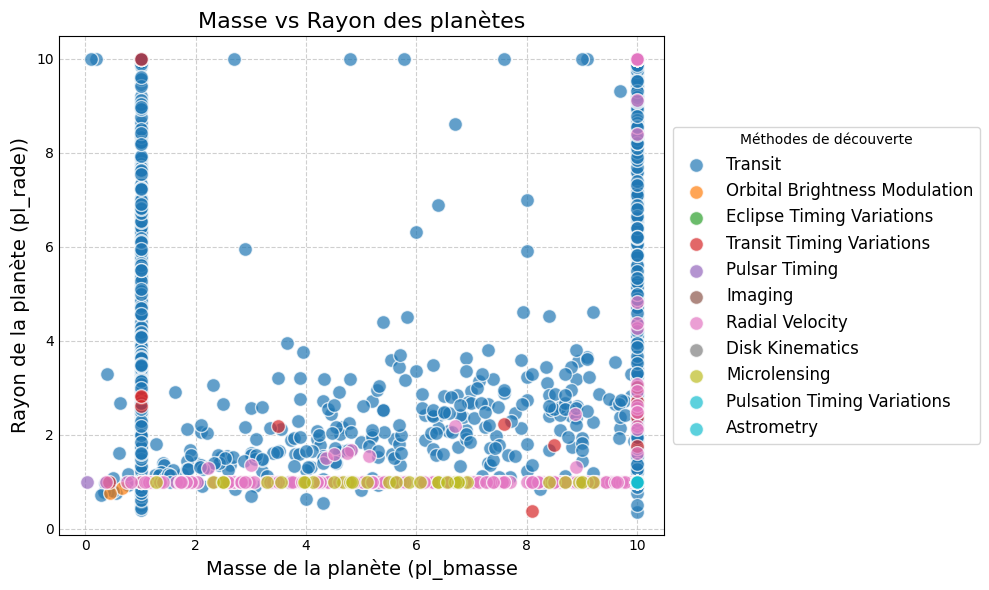

In [75]:
# Extraire les données
#x = [item['pl_bmasse'] for item in data_table_dict ]  # Rayon (X)
#y = [item['pl_rade'] for item in data_table_dict]  # Masse (Y)

x = [max(0.01, min(10.00, item['pl_bmasse'] if item['pl_bmasse'] is not None else 0.00)) for item in data_table_dict]
y = [max(0.01, min(10.00, item['pl_rade'] if item['pl_rade'] is not None else 0.00)) for item in data_table_dict]

methods = [item['discoverymethod'] for item in data_table_dict]  # Méthode de découverte

# Taille fixe des points
size = 100  # Taille fixe des points

# Générer une palette de couleurs pour les méthodes
unique_methods = list(set(methods))
colors = {method: plt.cm.tab10(i) for i, method in enumerate(unique_methods)}

# Tracer le graphique
plt.figure(figsize=(10, 6))

for method in unique_methods:
    # Filtrer les données par méthode
    x_vals = [x[i] for i in range(len(x)) if methods[i] == method]
    y_vals = [y[i] for i in range(len(y)) if methods[i] == method]
    #print(x_vals)
    plt.scatter(x_vals, y_vals, s=size, color=colors[method], label=method, alpha=0.7, edgecolors='w')

# Ajouter des détails au graphique
plt.title("Masse vs Rayon des planètes", fontsize=16)
plt.xlabel("Masse de la planète (pl_bmasse", fontsize=14)
plt.ylabel("Rayon de la planète (pl_rade))", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

# Placer la légende sur la droite
plt.legend(title="Méthodes de découverte", fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5))

# Ajuster l'espacement
plt.tight_layout()

# Afficher le graphique
plt.show()

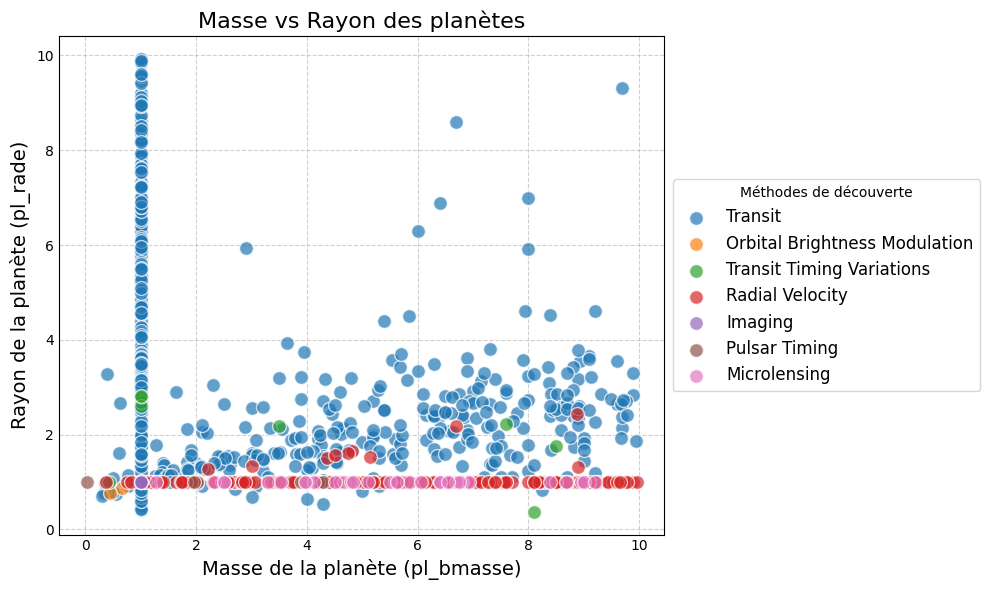

In [76]:
# Extraire les données
x = [item['pl_bmasse'] if item['pl_bmasse'] is not None else 0.00   for item in data_table_dict]
y = [item['pl_rade'] if item['pl_rade'] is not None else 0.00    for item in data_table_dict]
methods = [item['discoverymethod'] for item in data_table_dict]  # Méthode de découverte

# Filtrer les valeurs dans la plage (0, 10) exclusivement
filtered_data = [
    (x_val, y_val, method)
    for x_val, y_val, method in zip(x, y, methods)
    if 0 < x_val < 10 and 0 < y_val < 10
]

# Extraire les données filtrées
x_filtered = [data[0] for data in filtered_data]
y_filtered = [data[1] for data in filtered_data]
methods_filtered = [data[2] for data in filtered_data]

# Taille fixe des points
size = 100  # Taille fixe des points

# Générer une palette de couleurs pour les méthodes
unique_methods = list(set(methods_filtered))
colors = {method: plt.cm.tab10(i) for i, method in enumerate(unique_methods)}

# Tracer le graphique
plt.figure(figsize=(10, 6))

for method in unique_methods:
    # Filtrer les données par méthode
    x_vals = [x_filtered[i] for i in range(len(x_filtered)) if methods_filtered[i] == method]
    y_vals = [y_filtered[i] for i in range(len(y_filtered)) if methods_filtered[i] == method]
    plt.scatter(x_vals, y_vals, s=size, color=colors[method], label=method, alpha=0.7, edgecolors='w')

# Ajouter des détails au graphique
plt.title("Masse vs Rayon des planètes", fontsize=16)
plt.xlabel("Masse de la planète (pl_bmasse)", fontsize=14)
plt.ylabel("Rayon de la planète (pl_rade)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

# Placer la légende sur la droite
plt.legend(title="Méthodes de découverte", fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5))

# Ajuster l'espacement
plt.tight_layout()

# Afficher le graphique
plt.show()


### Nombre de planetes par masse

In [77]:
print(data_table_dict)

[{'pl_name': 'OGLE-TR-10 b', 'disc_year': 2004, 'sy_dist': 1344.97, 'discoverymethod': 'Transit', 'pl_bmasse': 359.1479, 'pl_rade': 19.279, 'pl_orbper': 3.1014, 'pl_eqt': 0.815, 'pl_dens': 1702.0}, {'pl_name': 'bet Pic b', 'disc_year': 2008, 'sy_dist': 19.7442, 'discoverymethod': 'Imaging', 'pl_bmasse': 6356.0, 'pl_rade': 18.495, 'pl_orbper': 8617.50952, 'pl_eqt': None, 'pl_dens': 1650.0}, {'pl_name': 'HD 180314 b', 'disc_year': 2010, 'sy_dist': 122.362, 'discoverymethod': 'Radial Velocity', 'pl_bmasse': 7216.92964, 'pl_rade': 1, 'pl_orbper': 396.03, 'pl_eqt': None, 'pl_dens': None}, {'pl_name': 'gam Lib b', 'disc_year': 2018, 'sy_dist': 47.4017, 'discoverymethod': 'Radial Velocity', 'pl_bmasse': 357.87479, 'pl_rade': 1, 'pl_orbper': 415.2, 'pl_eqt': None, 'pl_dens': None}, {'pl_name': 'gam Lib c', 'disc_year': 2018, 'sy_dist': 47.4017, 'discoverymethod': 'Radial Velocity', 'pl_bmasse': 1662.5604, 'pl_rade': 1, 'pl_orbper': 966.49, 'pl_eqt': None, 'pl_dens': None}, {'pl_name': 'HD 1100

Planets:        pl_name  disc_year   sy_dist  discoverymethod  pl_bmasse  pl_rade  \
6   GJ 667 C f       2013   7.24396  Radial Velocity     2.7000    1.000   
7   GJ 667 C c       2013   7.24396  Radial Velocity     4.5400    1.000   
26   TOI-561 c       2020  85.79900          Transit     7.0000    2.927   
35     K2-18 b       2015  38.02660          Transit     8.9200    2.610   
38    K2-266 d       2018  77.55860          Transit     8.9000    3.178   
39  TOI-1758 b       2024  96.62150          Transit     6.9000    3.620   
40      K2-3 b       2015  44.07270          Transit     8.4000    2.400   
45    GJ 433 b       2011   9.06456  Radial Velocity     6.3566    1.000   
49  TOI-406.01       2024  31.05970          Transit     6.5700    2.080   
55  TOI-1467 b       2024  37.44180          Transit     9.0000    1.920   

    pl_orbper  pl_eqt     pl_dens  
6   39.026000     NaN         NaN  
7   28.155000     NaN         NaN  
26  10.779000    1.60  860.000000  
35  32.947

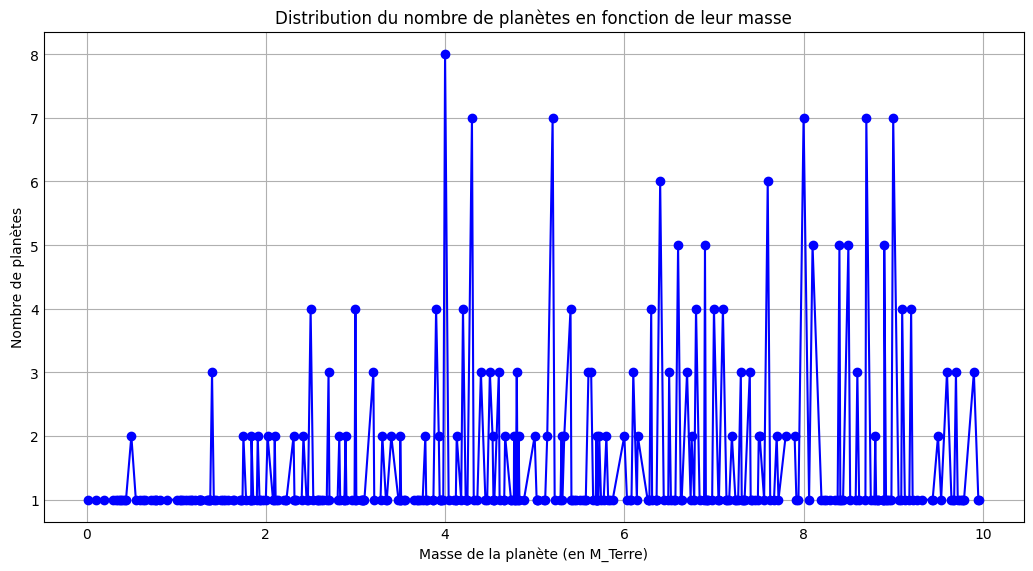

In [123]:
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

# Liste des planètes
planets = data_table_dict

# Convertir la liste en DataFrame
df = pd.DataFrame(planets)

# Filtrer les planètes ayant une valeur 'none' ou 1 dans la colonne 'pl_bmasse'
df_filtered = df[(df['pl_bmasse'] != 'none') & (df['pl_bmasse'] != 1) & (df['pl_bmasse'] > 0) & (df['pl_bmasse'] < 10)]

# Afficher les premières lignes du DataFrame filtré
print('Planets:', df_filtered.head(10))

# Extraire les masses
masses = df_filtered['pl_bmasse'].tolist()

# Compter les occurrences de chaque masse
mass_counts = Counter(masses)

# Trier les masses pour une courbe bien tracée
sorted_masses = sorted(mass_counts.keys())
sorted_counts = [mass_counts[mass] for mass in sorted_masses]

# Compter les occurrences de chaque valeur dans la colonne 'pl_bmasse'
value_counts = df['pl_bmasse'].value_counts()

# Afficher les comptes pour les valeurs
print(f"Value counts: {value_counts}")

# Vérifier les valeurs manquantes
missing_values = df['pl_bmasse'].isnull().sum()
print(f"Nombre de valeurs manquantes : {missing_values}")

# Vérifier si les valeurs '0' sont anormalement élevées
zero_count = value_counts.get(0, 0)
print(f"Nombre de valeurs '0' : {zero_count}")

# Afficher le nombre d'occurrences pour la valeur '1'
count_pl_bmasse_1 = value_counts.get(1, 0)
print(f"Nombre de valeurs 'pl_bmasse = 1' : {count_pl_bmasse_1}")

# Tracer la courbe
plt.figure(figsize=(10, 5))
plt.plot(sorted_masses, sorted_counts, marker='o', linestyle='-', color='b')
plt.xlabel("Masse de la planète (en M_Terre)")
plt.ylabel("Nombre de planètes")
plt.title("Distribution du nombre de planètes en fonction de leur masse")
plt.grid()
plt.show()


Planets:        pl_name  disc_year    sy_dist  discoverymethod  pl_bmasse  pl_rade  \
6   GJ 667 C f       2013    7.24396  Radial Velocity    2.70000    1.000   
7   GJ 667 C c       2013    7.24396  Radial Velocity    4.54000    1.000   
24  HAT-P-18 b       2010  161.40000          Transit   63.56600   11.153   
26   TOI-561 c       2020   85.79900          Transit    7.00000    2.927   
27   WASP-47 d       2015  264.78000          Transit   16.80000    3.710   
28      K2-3 d       2015   44.07270          Transit   11.10000    1.700   
30   GJ 3470 b       2012   29.42140  Radial Velocity   14.10000    4.830   
31    55 Cnc e       2004   12.58550  Radial Velocity   14.30235    2.173   
34   WASP-47 e       2015  264.78000          Transit   22.00000    1.830   
35     K2-18 b       2015   38.02660          Transit    8.92000    2.610   

    pl_orbper  pl_eqt  pl_dens  
6   39.026000     NaN      NaN  
7   28.155000     NaN      NaN  
24   5.508068   0.286    852.0  
26  10.7790

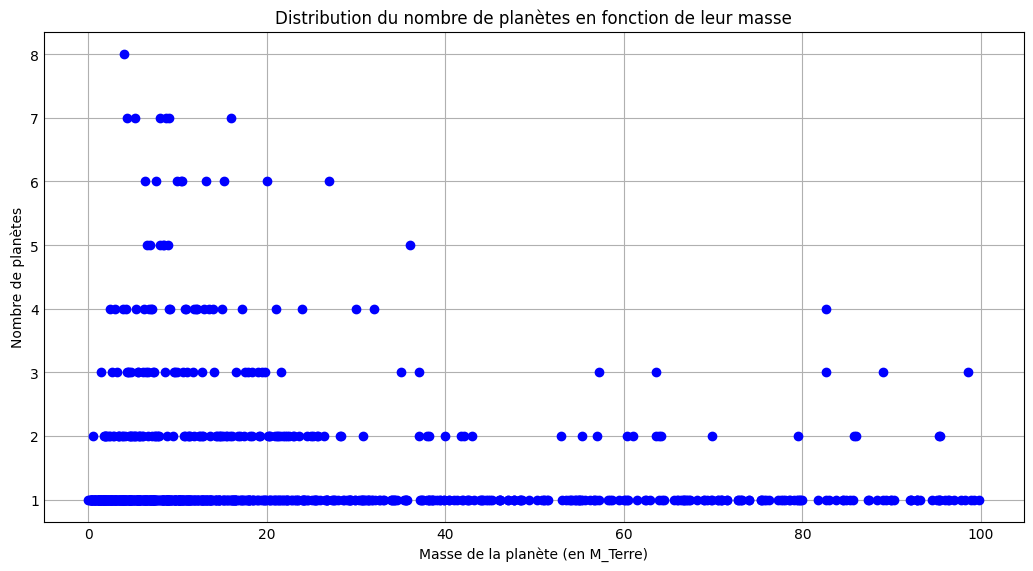

In [124]:
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

# Liste des planètes
planets = data_table_dict

# Convertir la liste en DataFrame
df = pd.DataFrame(planets)

# Filtrer les planètes ayant une valeur 'none' ou 1 dans la colonne 'pl_bmasse'
df_filtered = df[(df['pl_bmasse'] != 'none') & (df['pl_bmasse'] != 1) & (df['pl_bmasse'] > 0) & (df['pl_bmasse'] < 100)]

# Afficher les premières lignes du DataFrame filtré
print('Planets:', df_filtered.head(10))

# Extraire les masses
masses = df_filtered['pl_bmasse'].tolist()

# Compter les occurrences de chaque masse
mass_counts = Counter(masses)

# Trier les masses pour un nuage de points bien tracé
sorted_masses = sorted(mass_counts.keys())
sorted_counts = [mass_counts[mass] for mass in sorted_masses]

# Compter les occurrences de chaque valeur dans la colonne 'pl_bmasse'
value_counts = df['pl_bmasse'].value_counts()

# Afficher les comptes pour les valeurs
print(f"Value counts: {value_counts}")

# Vérifier les valeurs manquantes
missing_values = df['pl_bmasse'].isnull().sum()
print(f"Nombre de valeurs manquantes : {missing_values}")

# Vérifier si les valeurs '0' sont anormalement élevées
zero_count = value_counts.get(0, 0)
print(f"Nombre de valeurs '0' : {zero_count}")

# Afficher le nombre d'occurrences pour la valeur '1'
count_pl_bmasse_1 = value_counts.get(1, 0)
print(f"Nombre de valeurs 'pl_bmasse = 1' : {count_pl_bmasse_1}")

# Tracer le nuage de points
plt.figure(figsize=(10, 5))
plt.scatter(sorted_masses, sorted_counts, color='b')
plt.xlabel("Masse de la planète (en M_Terre)")
plt.ylabel("Nombre de planètes")
plt.title("Distribution du nombre de planètes en fonction de leur masse")
plt.grid()
plt.show()


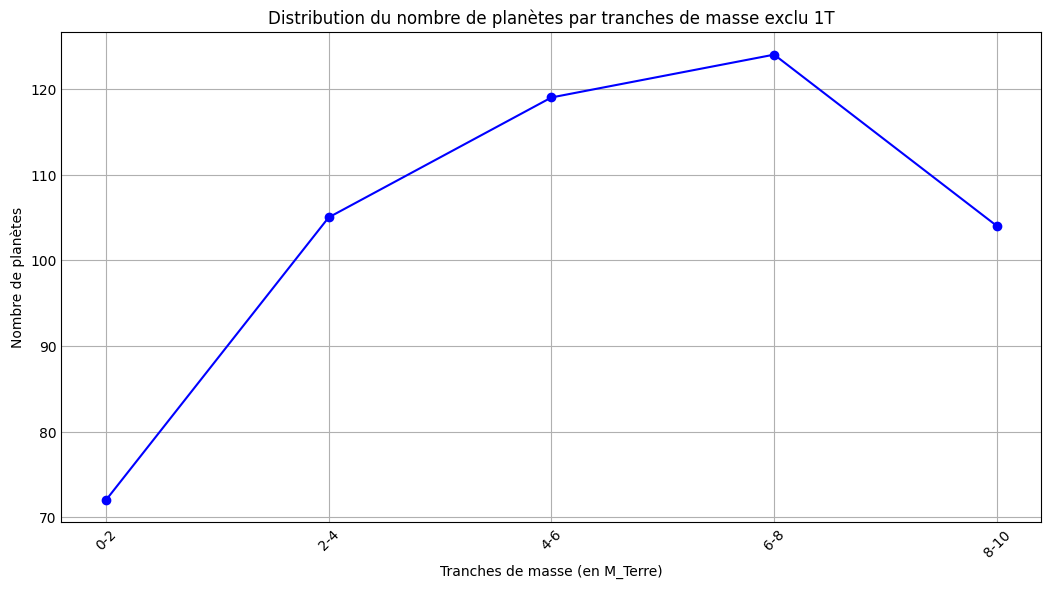

In [134]:
import matplotlib.pyplot as plt
import pandas as pd

# Liste des planètes
planets = data_table_dict

# Convertir la liste en DataFrame
df = pd.DataFrame(planets)

# Filtrer les planètes ayant une valeur 'none' ou 1 dans la colonne 'pl_bmasse'
df_filtered = df[(df['pl_bmasse'] != 'none') & (df['pl_bmasse'] != 1) & (df['pl_bmasse'] > 0) & (df['pl_bmasse'] < 10)].copy()


# Convertir 'pl_bmasse' en type numérique si nécessaire
df_filtered.loc[:, 'pl_bmasse'] = pd.to_numeric(df_filtered['pl_bmasse'], errors='coerce')

# Définir les tranches
bins = [0, 2, 4, 6, 8, 10]
labels = ['0-2', '2-4', '4-6', '6-8', '8-10']

# Diviser les données en tranches
df_filtered.loc[:, 'mass_bin'] = pd.cut(df_filtered['pl_bmasse'], bins=bins, labels=labels, include_lowest=True)

# Compter le nombre de planètes dans chaque tranche
bin_counts = df_filtered['mass_bin'].value_counts().sort_index()

# Tracer la courbe
plt.figure(figsize=(10, 5))
plt.plot(bin_counts.index, bin_counts.values, marker='o', linestyle='-', color='b')
plt.xlabel("Tranches de masse (en M_Terre)")
plt.ylabel("Nombre de planètes")
plt.title("Distribution du nombre de planètes par tranches de masse exclu 1T")
plt.grid()
plt.xticks(rotation=45)
plt.show()



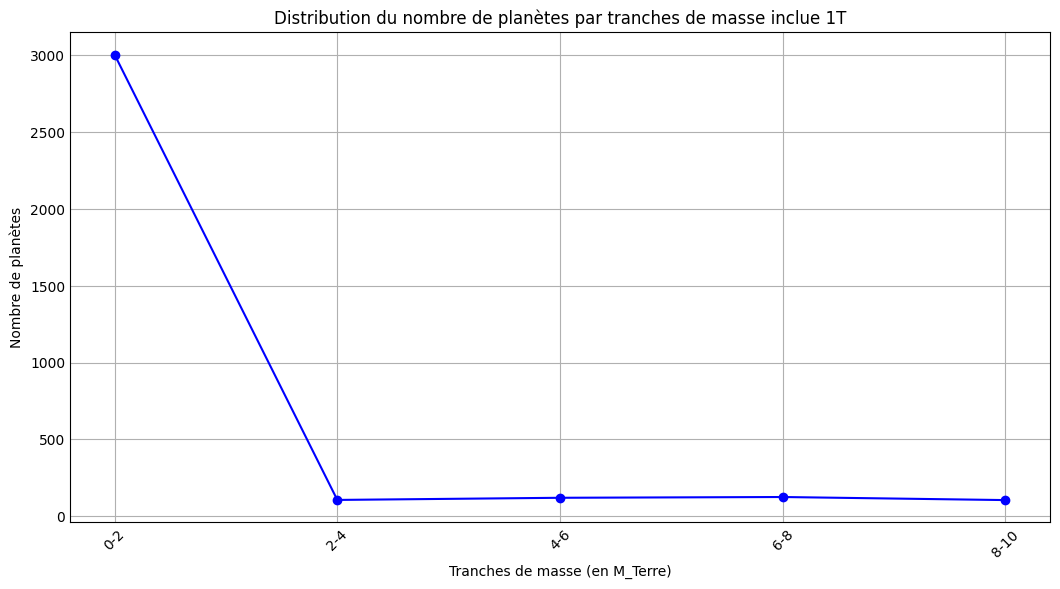

In [135]:
import matplotlib.pyplot as plt
import pandas as pd

# Liste des planètes
planets = data_table_dict

# Convertir la liste en DataFrame
df = pd.DataFrame(planets)

# Filtrer les planètes ayant une valeur 'none' ou 1 dans la colonne 'pl_bmasse'
df_filtered = df[(df['pl_bmasse'] != 'none') &  (df['pl_bmasse'] > 0) & (df['pl_bmasse'] < 10)].copy()


# Convertir 'pl_bmasse' en type numérique si nécessaire
df_filtered.loc[:, 'pl_bmasse'] = pd.to_numeric(df_filtered['pl_bmasse'], errors='coerce')

# Définir les tranches
bins = [0, 2, 4, 6, 8, 10]
labels = ['0-2', '2-4', '4-6', '6-8', '8-10']

# Diviser les données en tranches
df_filtered.loc[:, 'mass_bin'] = pd.cut(df_filtered['pl_bmasse'], bins=bins, labels=labels, include_lowest=True)

# Compter le nombre de planètes dans chaque tranche
bin_counts = df_filtered['mass_bin'].value_counts().sort_index()

# Tracer la courbe
plt.figure(figsize=(10, 5))
plt.plot(bin_counts.index, bin_counts.values, marker='o', linestyle='-', color='b')
plt.xlabel("Tranches de masse (en M_Terre)")
plt.ylabel("Nombre de planètes")
plt.title("Distribution du nombre de planètes par tranches de masse inclue 1T")
plt.grid()
plt.xticks(rotation=45)
plt.show()


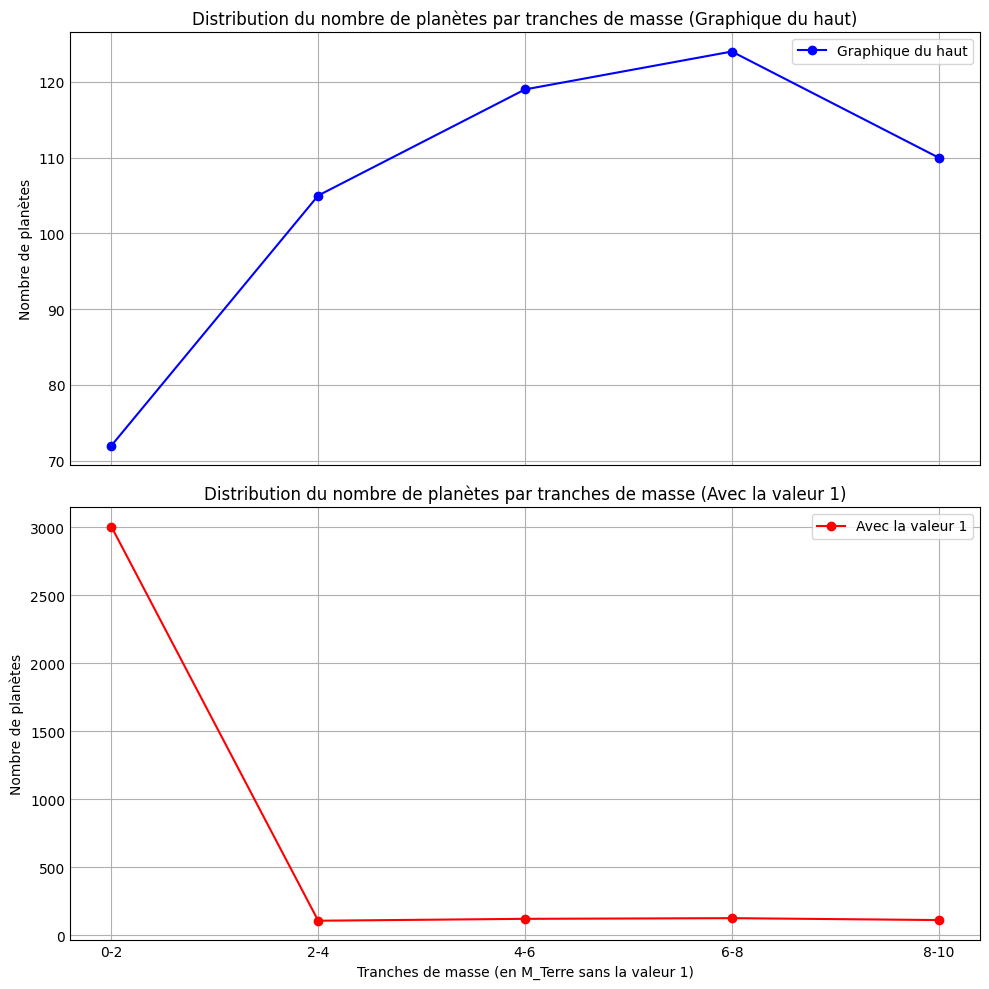

In [146]:

import matplotlib.pyplot as plt
import pandas as pd

# Liste des planètes
planets = data_table_dict

# Convertir la liste en DataFrame
df = pd.DataFrame(planets)

# Filtrer les planètes ayant une valeur 'none' ou 1 dans la colonne 'pl_bmasse'
df_filtered = df[(df['pl_bmasse'] != 'none') & (df['pl_bmasse'] != 1) & (df['pl_bmasse'] > 0) & (df['pl_bmasse'] < 100)].copy()
df_filtered_moins1 = df[(df['pl_bmasse'] != 'none') &  (df['pl_bmasse'] > 0) & (df['pl_bmasse'] < 100)].copy()

# Convertir 'pl_bmasse' en type numérique si nécessaire
df_filtered.loc[:, 'pl_bmasse'] = pd.to_numeric(df_filtered['pl_bmasse'], errors='coerce')
df_filtered_moins1.loc[:, 'pl_bmasse'] = pd.to_numeric(df_filtered_moins1['pl_bmasse'], errors='coerce')

# Définir les tranches
bins = [0, 2, 4, 6, 8, 10]
labels = ['0-2', '2-4', '4-6', '6-8', '8-10']

# Diviser les données en tranches
df_filtered.loc[:, 'mass_bin'] = pd.cut(df_filtered['pl_bmasse'], bins=bins, labels=labels, include_lowest=True)
df_filtered_moins1.loc[:, 'mass_bin'] = pd.cut(df_filtered_moins1['pl_bmasse'], bins=bins, labels=labels, include_lowest=True)

# Compter le nombre de planètes dans chaque tranche
bin_counts = df_filtered['mass_bin'].value_counts().sort_index()
bin_counts_moins1 = df_filtered_moins1['mass_bin'].value_counts().sort_index()

# Créer une figure avec deux sous-graphiques
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# Tracer le premier graphique
ax1.plot(bin_counts.index, bin_counts.values, marker='o', linestyle='-', color='b', label='Graphique du haut')
ax1.set_ylabel("Nombre de planètes")
ax1.set_title("Distribution du nombre de planètes par tranches de masse (Graphique du haut)")
ax1.legend()
ax1.grid()

# Tracer le second graphique (identique au premier)
ax2.plot(bin_counts_moins1.index, bin_counts_moins1.values, marker='o', linestyle='-', color='r', label='Avec la valeur 1')
ax2.set_xlabel("Tranches de masse (en M_Terre sans la valeur 1)")
ax2.set_ylabel("Nombre de planètes")
ax2.set_title("Distribution du nombre de planètes par tranches de masse (Avec la valeur 1)")
ax2.legend()
ax2.grid()

# Ajuster l'espacement entre les graphiques
plt.tight_layout()

# Afficher les graphiques
plt.show()



In [141]:
#en mode liste sans pandas

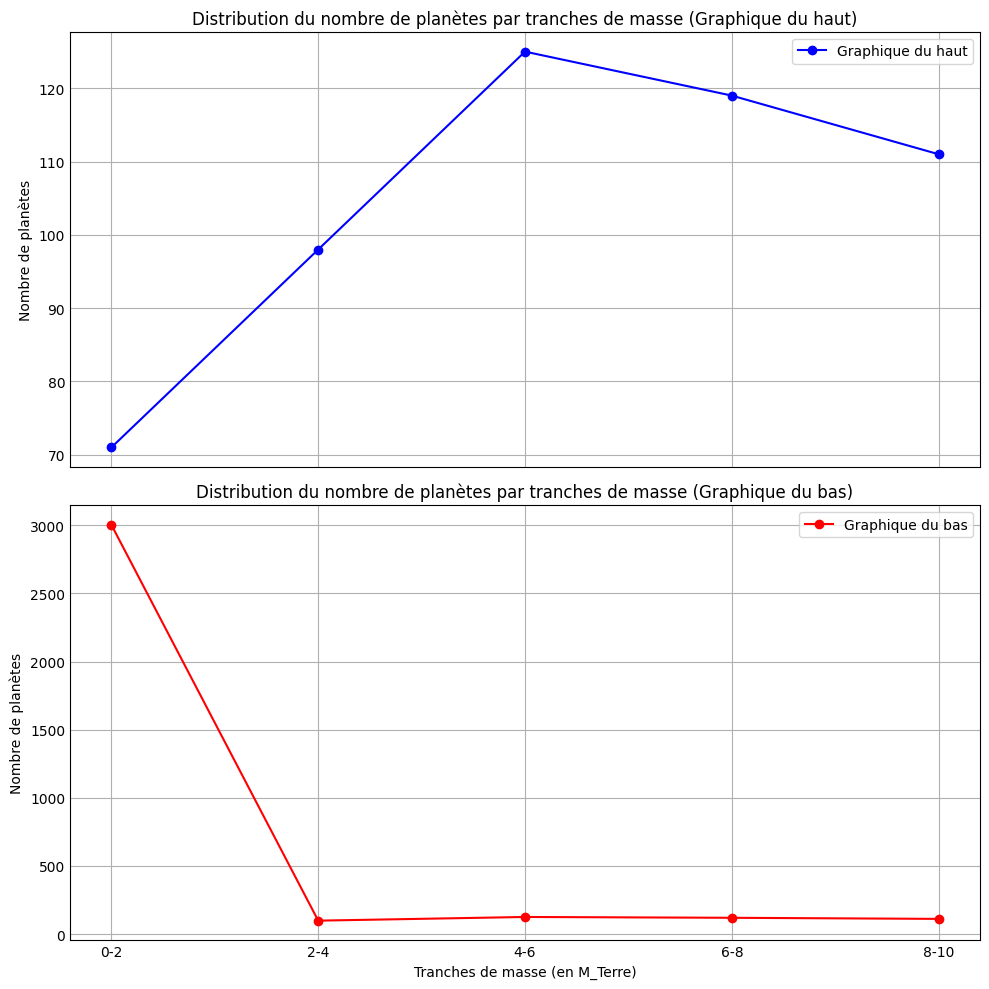

In [148]:
import matplotlib.pyplot as plt
from collections import Counter

# Liste des planètes
planets = data_table_dict

# Filtrer les planètes ayant une valeur 'none' ou 1 dans la colonne 'pl_bmasse'
filtered_planets = [
    planet for planet in planets
    if planet['pl_bmasse'] not in ['none', '1', 1] and 0 < float(planet['pl_bmasse']) < 100
]

# Filtrer les planètes ayant une valeur 'none' ou 1 dans la colonne 'pl_bmasse'
filtered_planets_avec_1 = [
    planet for planet in planets
    if planet['pl_bmasse'] not in ['none'] and 0 < float(planet['pl_bmasse']) < 100
]

# Extraire les masses
masses = [float(planet['pl_bmasse']) for planet in filtered_planets]
masses_avec_1 = [float(planet['pl_bmasse']) for planet in filtered_planets_avec_1]

# Définir les tranches
bins = [0, 2, 4, 6, 8, 10]
labels = ['0-2', '2-4', '4-6', '6-8', '8-10']

# Diviser les données en tranches
mass_bins = []
for mass in masses:
    for j in range(len(bins) - 1):
        if bins[j] <= mass < bins[j + 1]:
            mass_bins.append(labels[j])
            break

mass_bins_avec_1 = []
for mass in masses_avec_1:
    for j in range(len(bins) - 1):
        if bins[j] <= mass < bins[j + 1]:
            mass_bins_avec_1.append(labels[j])
            break

# Compter les occurrences de chaque tranche
bin_counts = Counter(mass_bins)
bin_counts_avec_1 = Counter(mass_bins_avec_1)

# Trier les tranches pour un graphique bien tracé
sorted_bins = sorted(bin_counts.keys(), key=lambda x: int(x.split('-')[0]))
sorted_counts = [bin_counts[bin] for bin in sorted_bins]

# Trier les tranches pour un graphique bien tracé
sorted_bins_avec_1 = sorted(bin_counts_avec_1.keys(), key=lambda x: int(x.split('-')[0]))
sorted_counts_avec_1 = [bin_counts_avec_1[bin] for bin in sorted_bins_avec_1]


# Créer une figure avec deux sous-graphiques
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# Tracer le premier graphique
ax1.plot(sorted_bins, sorted_counts, marker='o', linestyle='-', color='b', label='Graphique du haut')
ax1.set_ylabel("Nombre de planètes")
ax1.set_title("Distribution du nombre de planètes par tranches de masse (Graphique du haut)")
ax1.legend()
ax1.grid()

# Tracer le second graphique (identique au premier)
ax2.plot(sorted_bins_avec_1, sorted_counts_avec_1, marker='o', linestyle='-', color='r', label='Graphique du bas')
ax2.set_xlabel("Tranches de masse (en M_Terre)")
ax2.set_ylabel("Nombre de planètes")
ax2.set_title("Distribution du nombre de planètes par tranches de masse (Graphique du bas)")
ax2.legend()
ax2.grid()

# Ajuster l'espacement entre les graphiques
plt.tight_layout()

# Afficher les graphiques
plt.show()


In [144]:
!pip freeze

annotated-types==0.7.0
anyio==4.6.2.post1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asttokens==2.4.1
async-lru==2.0.4
attrs==24.2.0
babel==2.16.0
beautifulsoup4==4.12.3
binaryornot==0.4.4
bleach==6.1.0
buildozer==1.5.0
certifi==2024.8.30
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.0
click==8.1.7
comm==0.2.2
contourpy==1.3.1
cookiecutter==2.6.0
cycler==0.12.1
Cython==0.29.33
debugpy==1.8.7
decorator==5.1.1
defusedxml==0.7.1
distlib==0.3.9
docutils==0.21.2
executing==2.1.0
fastapi==0.115.2
fastjsonschema==2.20.0
filelock==3.16.1
filetype==1.2.0
flet==0.24.1
flet-core==0.24.1
flet-runtime==0.24.1
fonttools==4.55.0
fqdn==1.5.1
h11==0.14.0
httpcore==1.0.6
httptools==0.6.4
httpx==0.27.2
idna==3.10
ipykernel==6.29.5
ipython==8.28.0
ipywidgets==8.1.5
isoduration==20.11.0
jedi==0.19.1
Jinja2==3.1.4
json5==0.9.25
jsonpointer==3.0.0
jsonschema==4.23.0
jsonschema-specifications==2024.10.1
jupyter==1.1.1
jupyter-console==6.6.3
jupyter-events==0.10.0
jupyter-lsp==2.2.5
ju